In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (1).xlsx


In [2]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [3]:
# 시간 데이터로 변환 (Pump-Begin 기준)
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])

In [4]:
# 금속 데이터 컬럼 추출 (Al ~ Bi)
metal_columns = df.columns[df.columns.str.endswith('(ng/m3)')]

In [5]:
# 금속 데이터 컬럼 전처리
df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)
df = df.dropna(subset=metal_columns, how='all')

/tmp/ipython-input-2339493798.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)


In [6]:
# 날짜 컬럼 생성 (datetime을 date로 변환)
df['Date'] = df['Pump-Begin'].dt.date

# 날짜 분할 (11일 단위)
unique_dates = sorted(df['Date'].unique())
chunks = [unique_dates[i:i+11] for i in range(0, len(unique_dates), 11)]

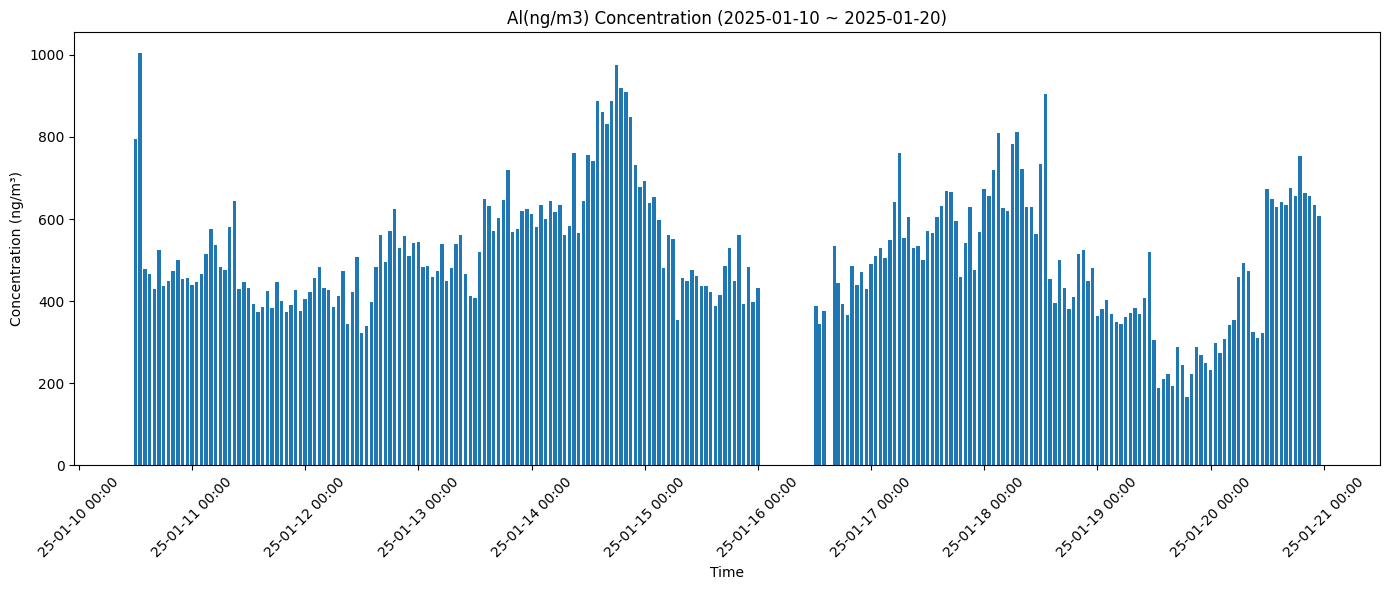

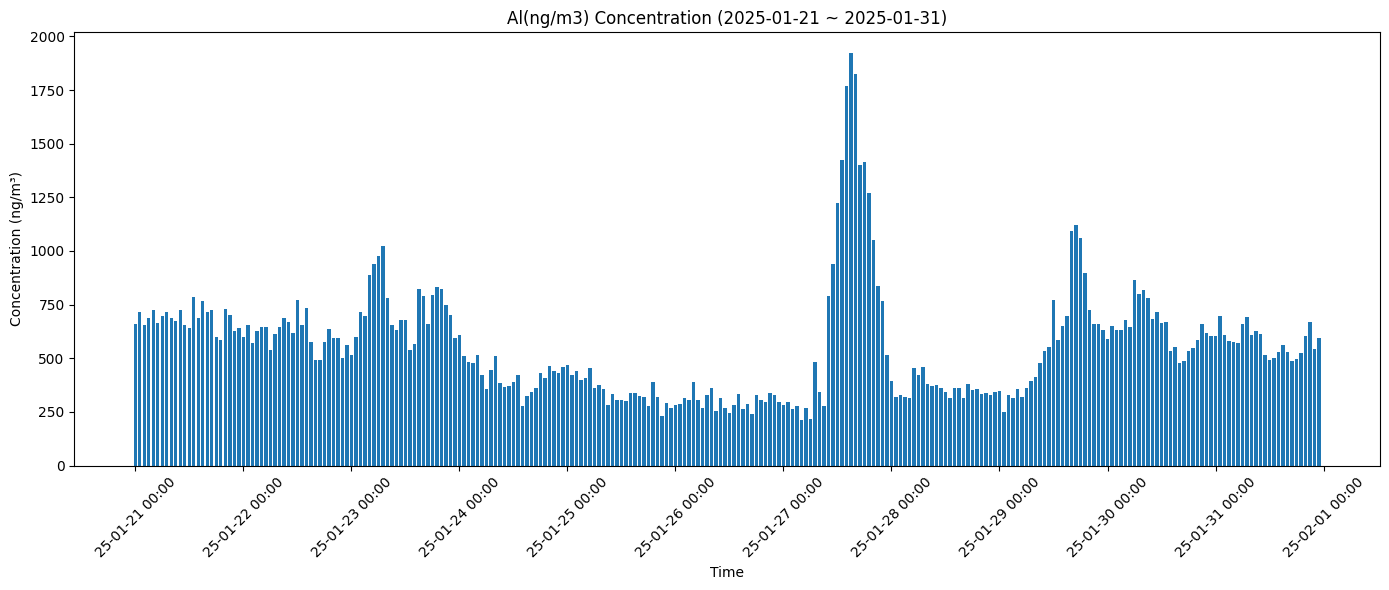

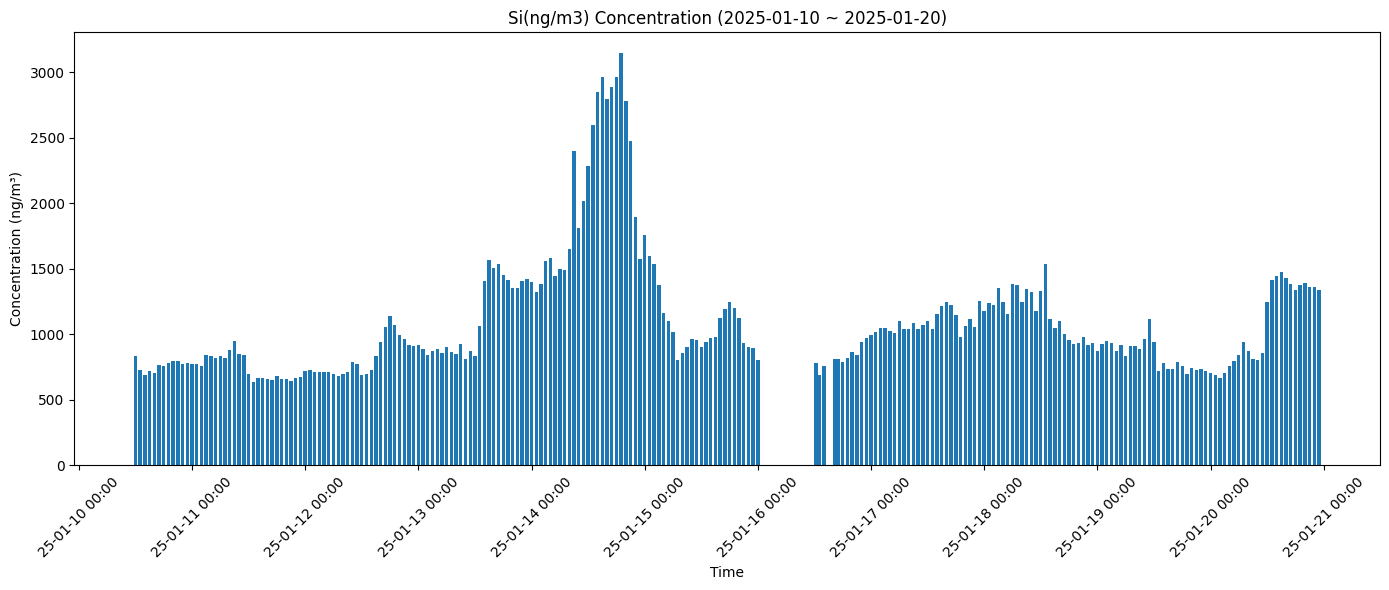

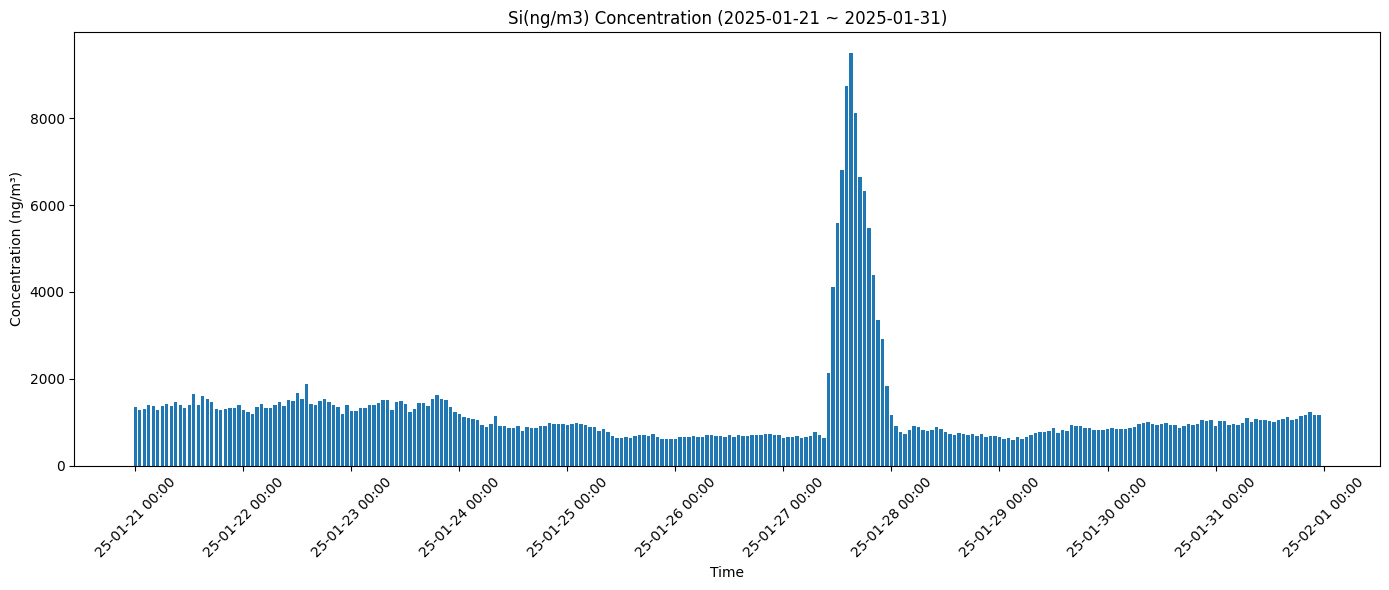

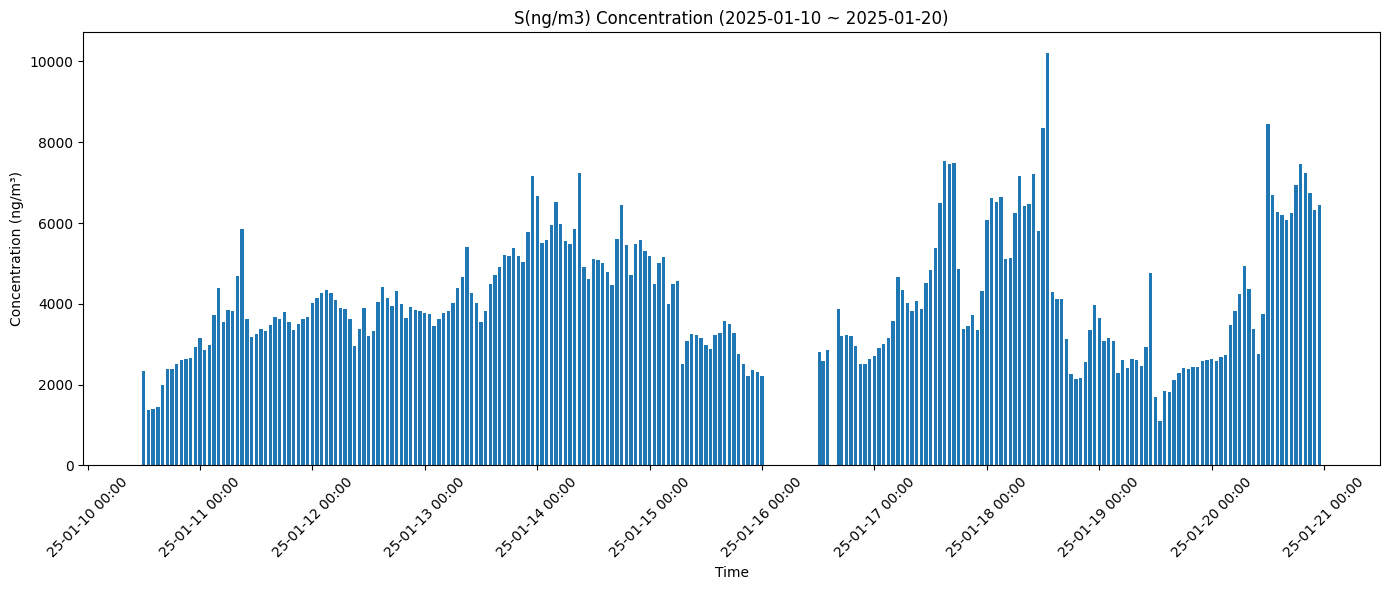

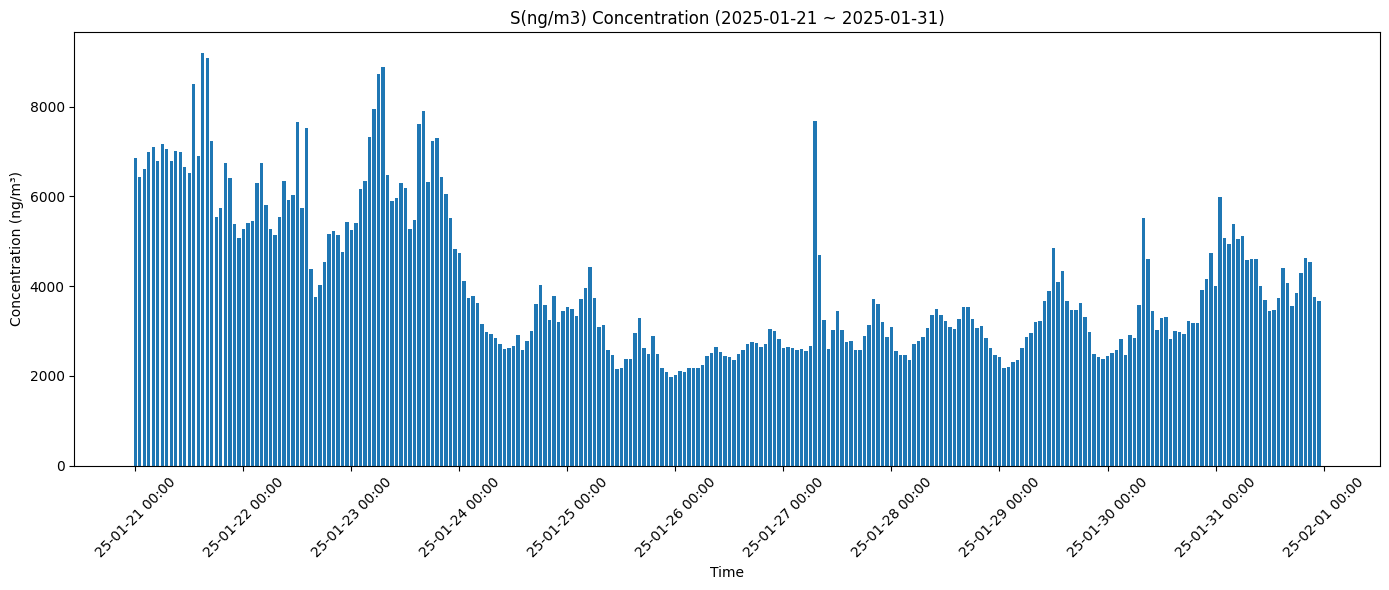

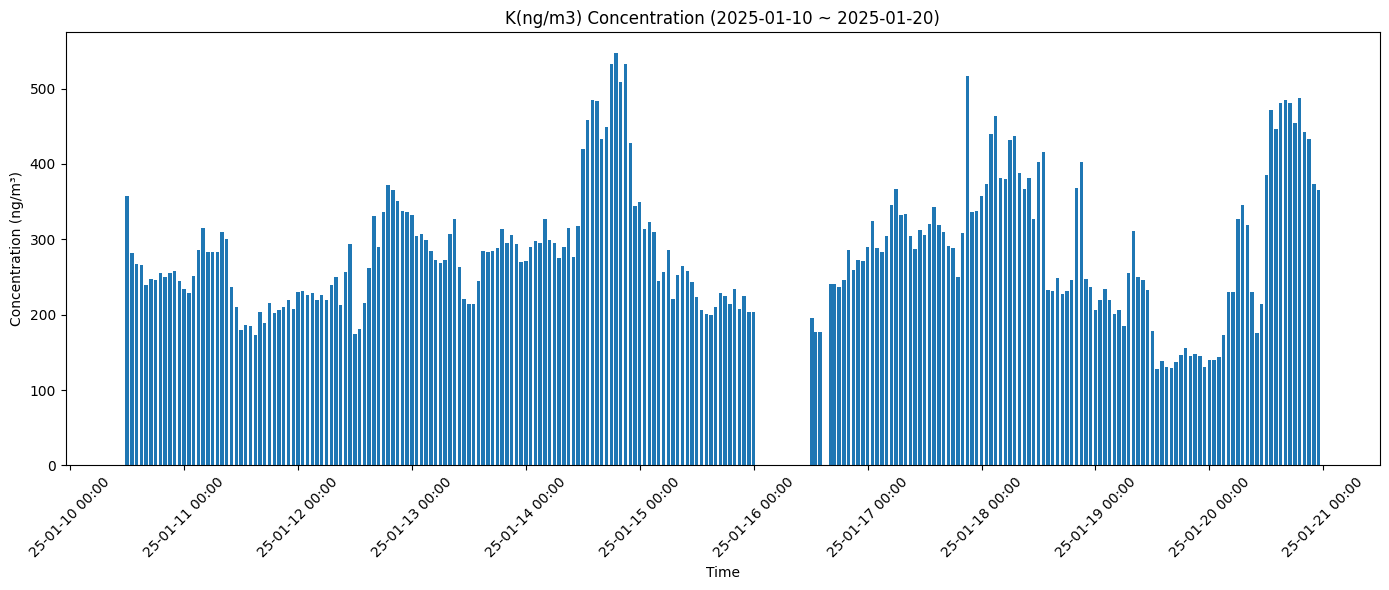

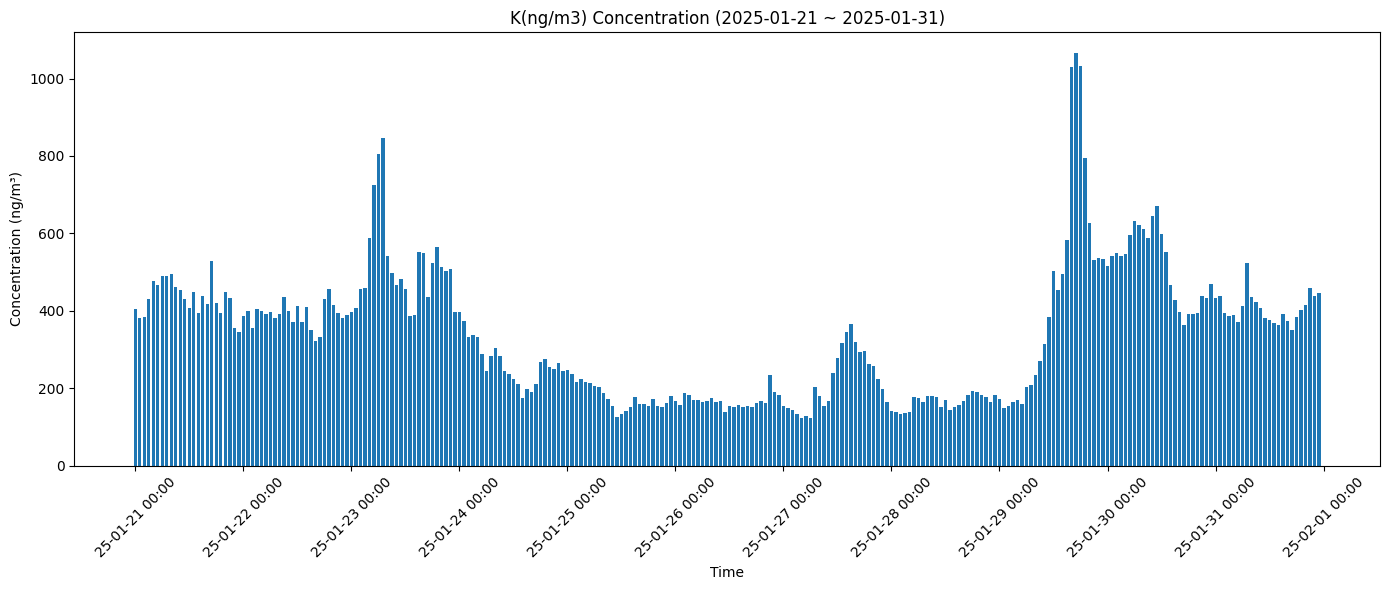

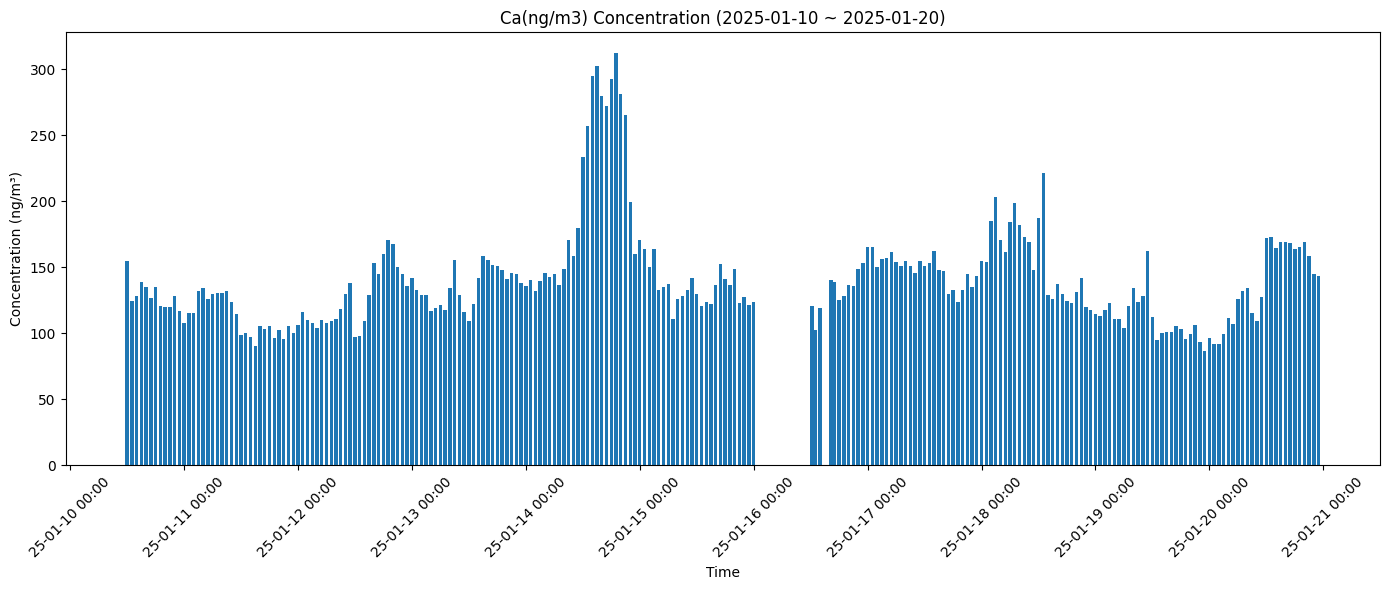

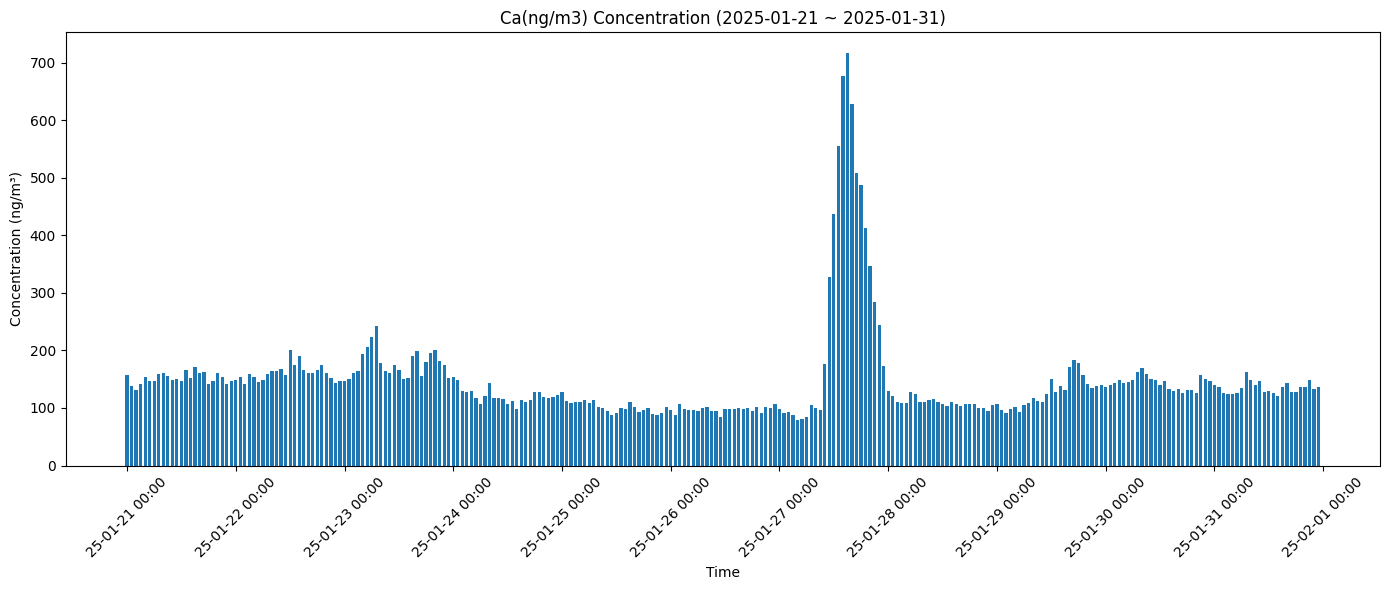

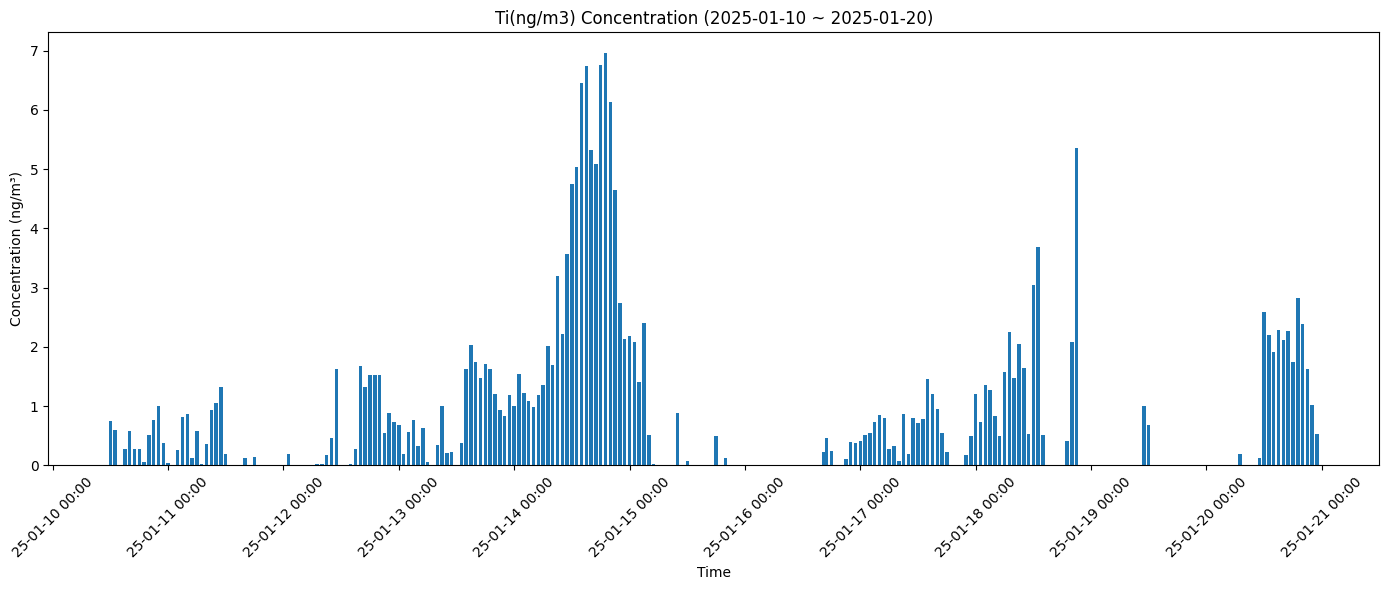

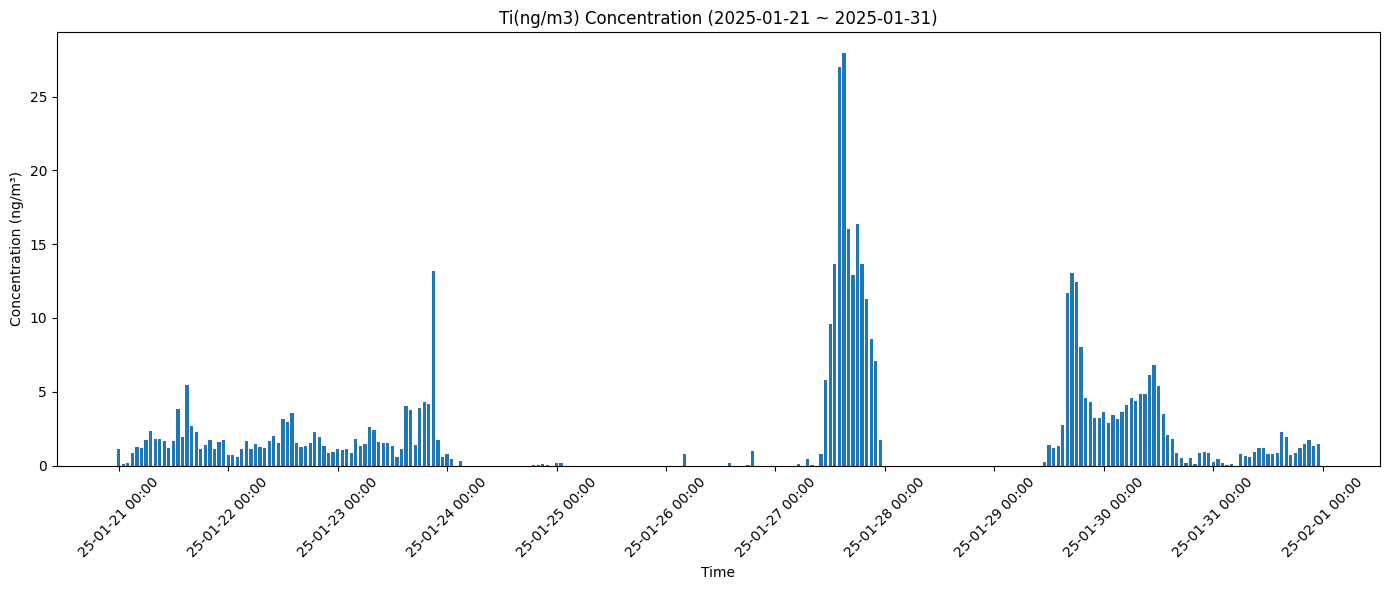

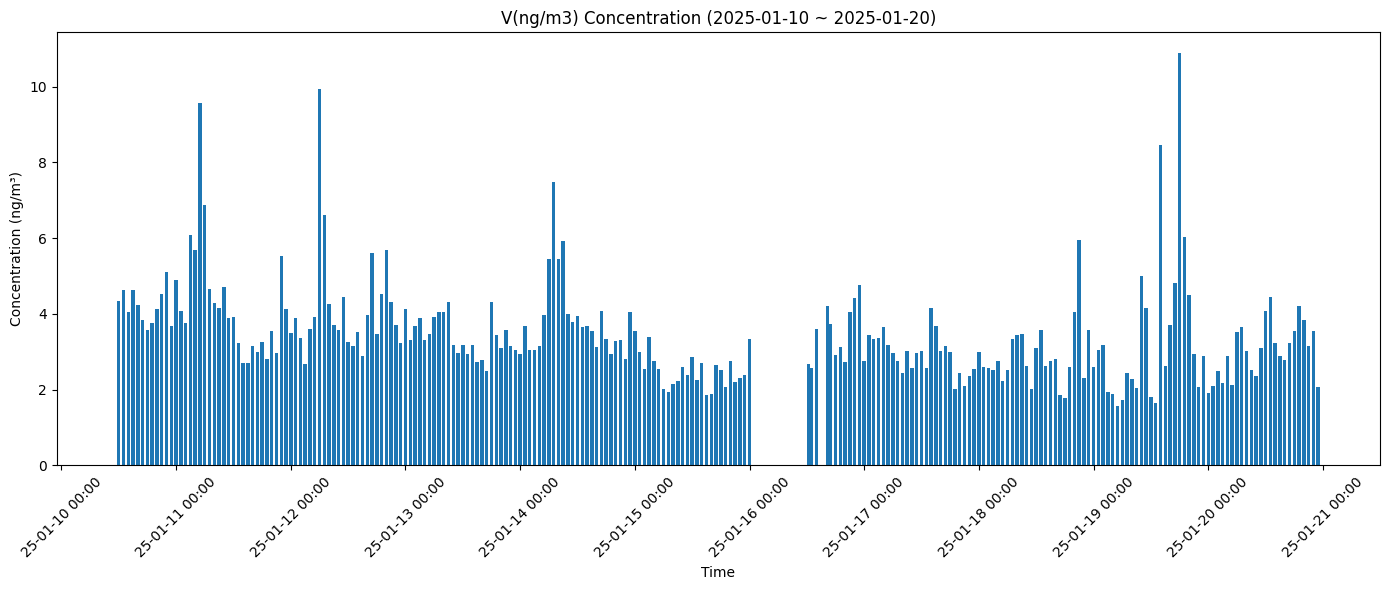

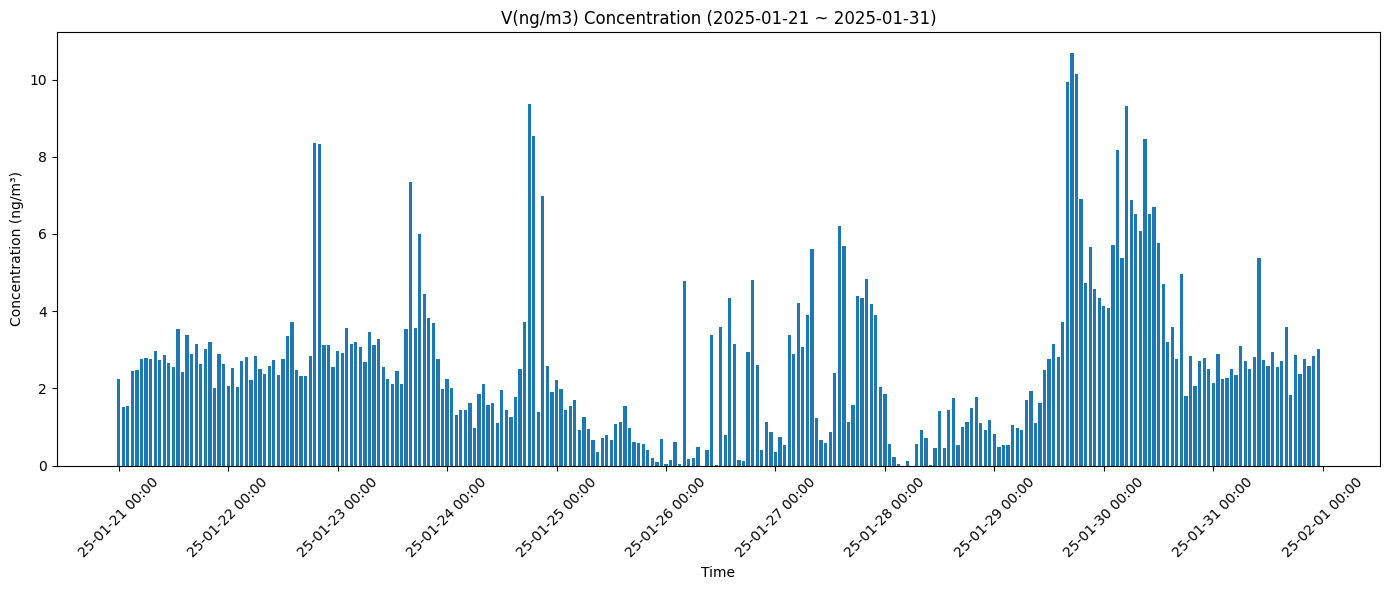

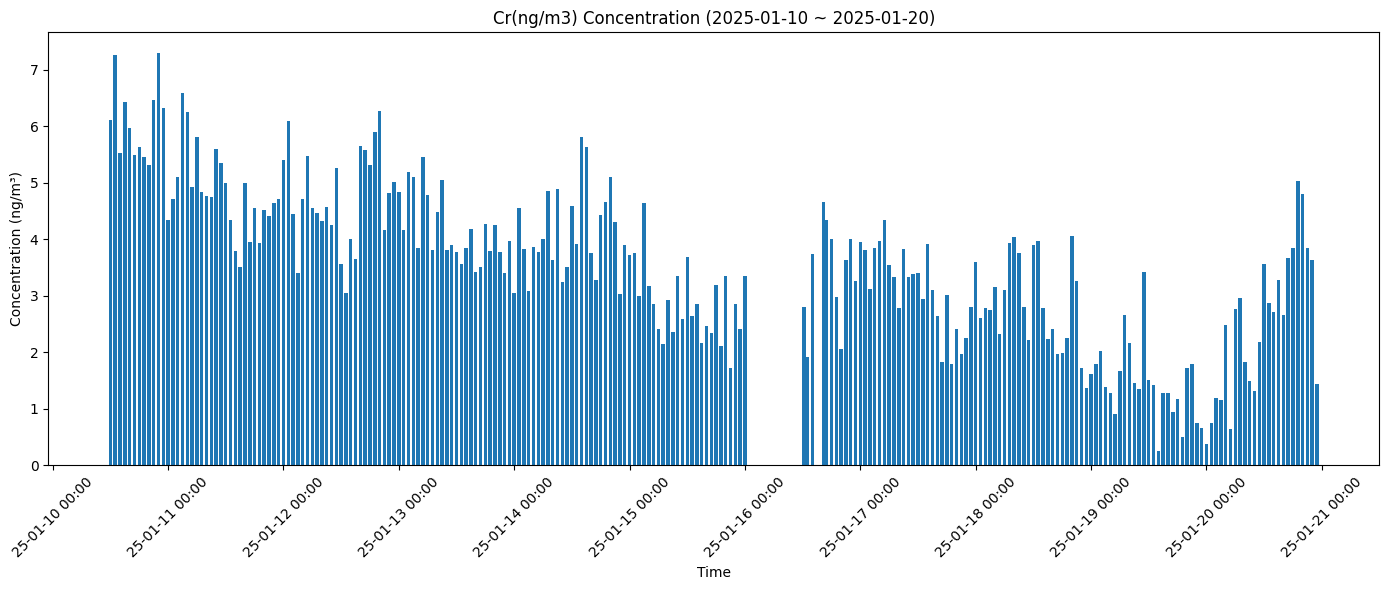

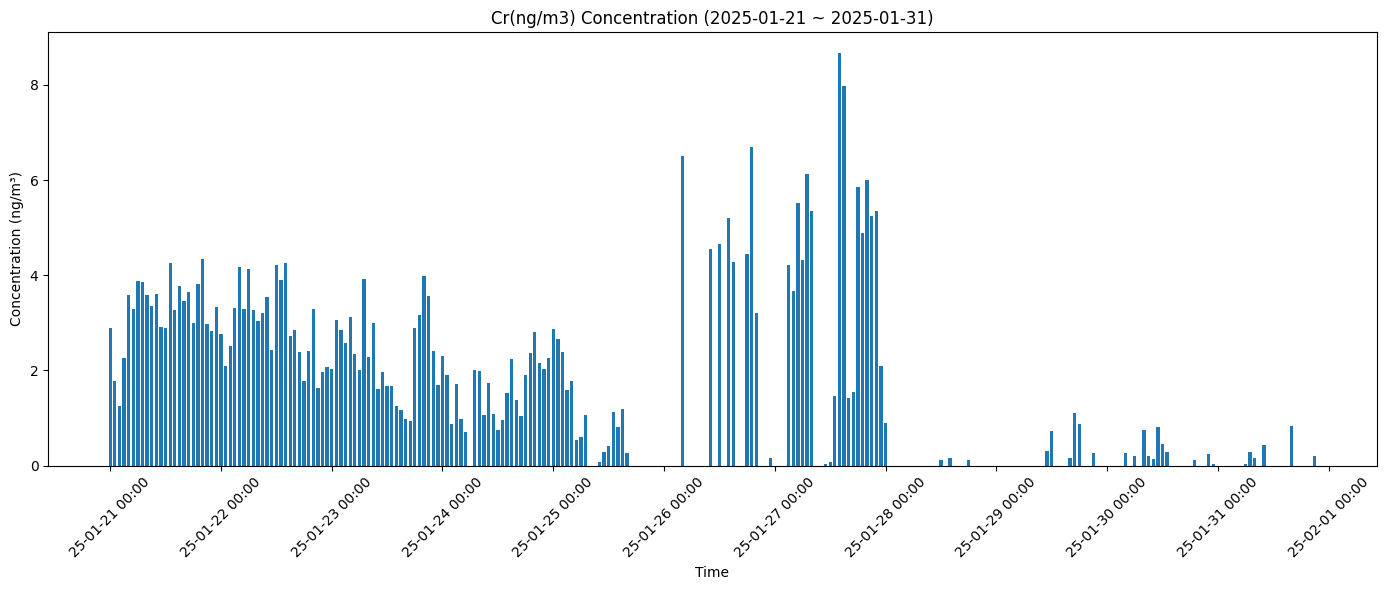

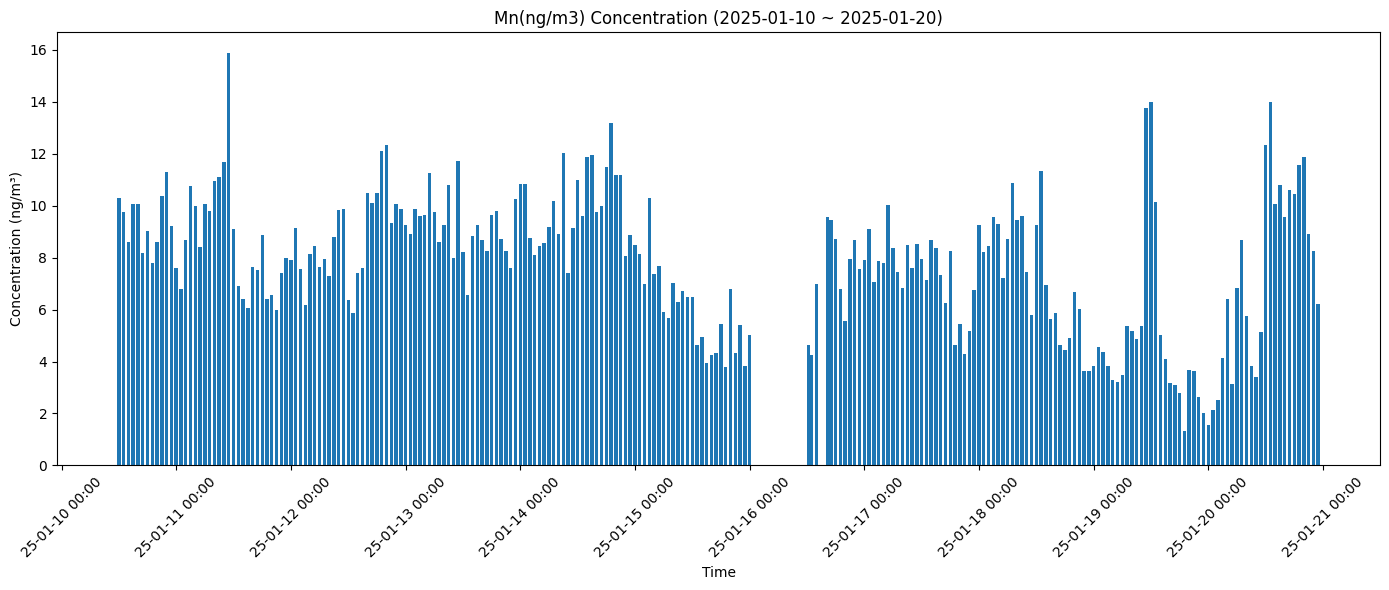

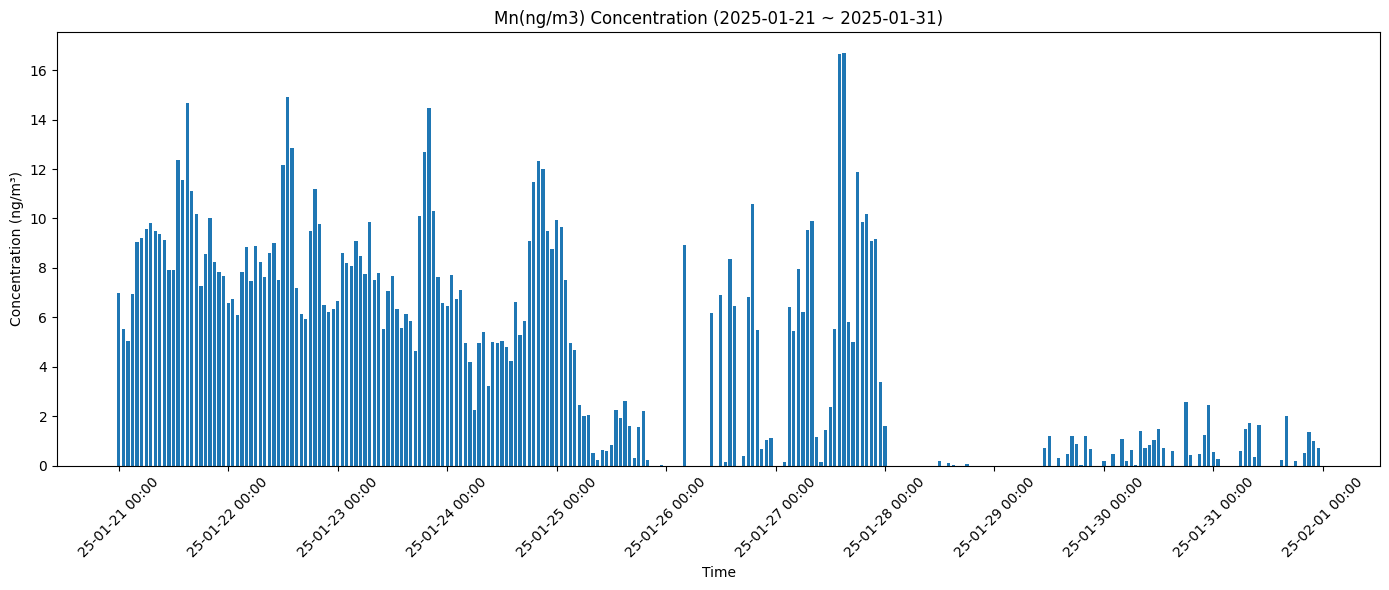

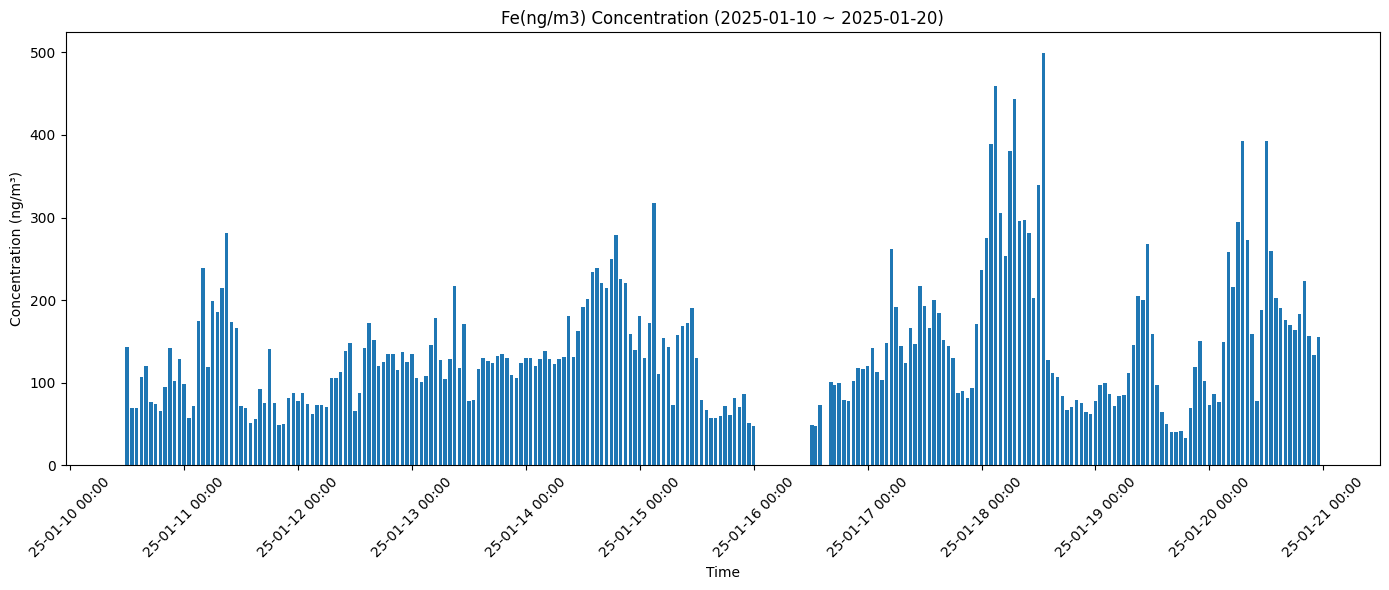

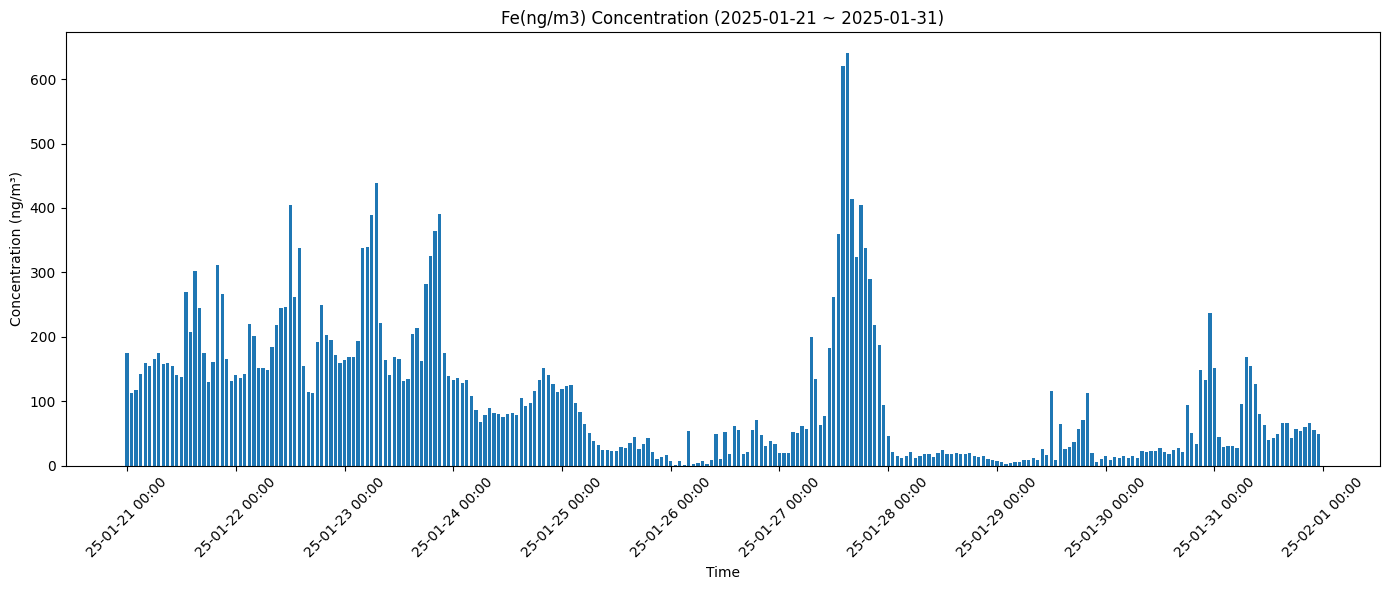

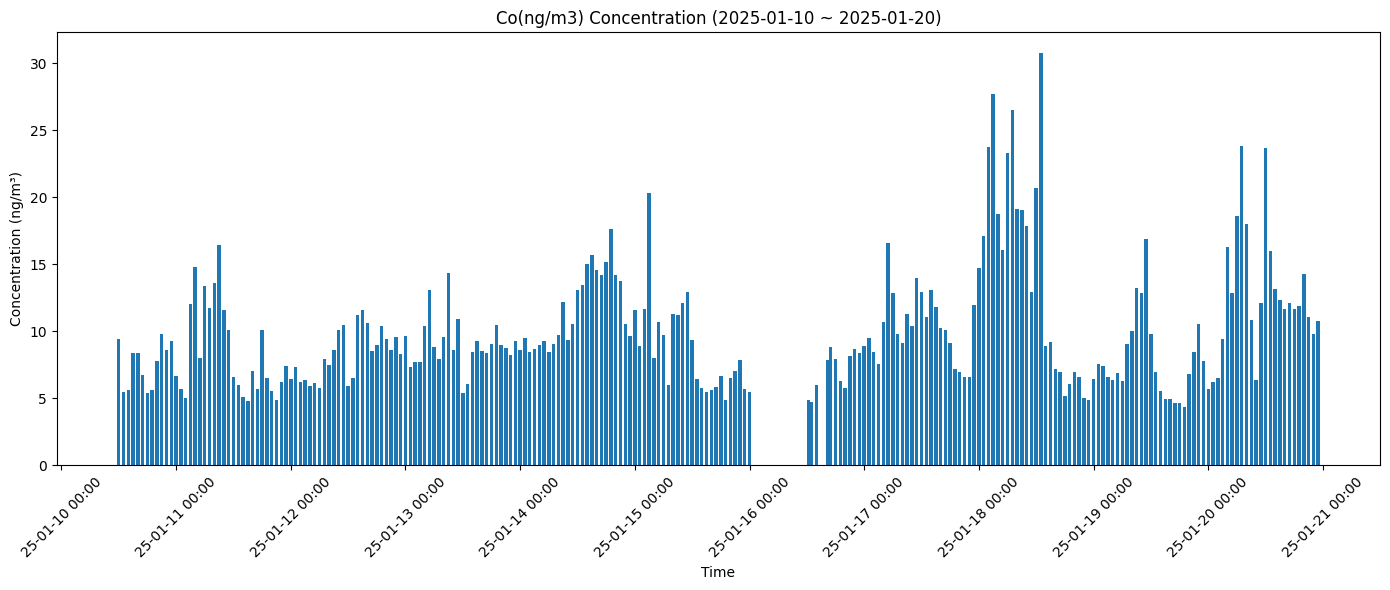

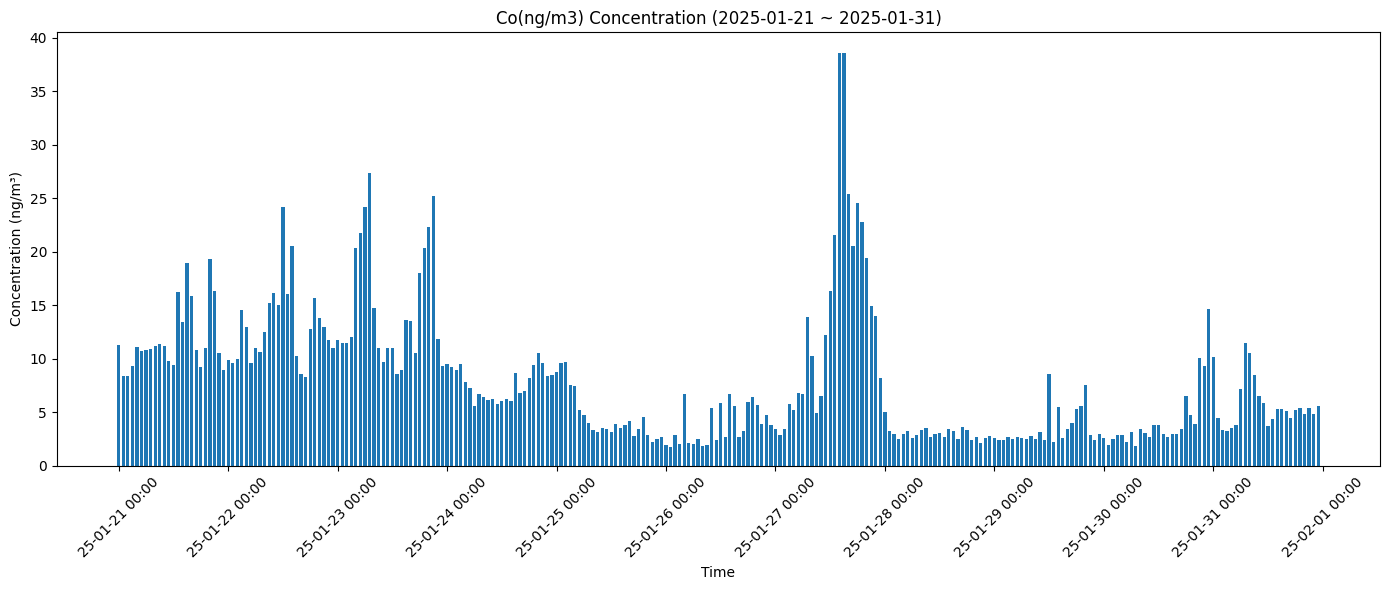

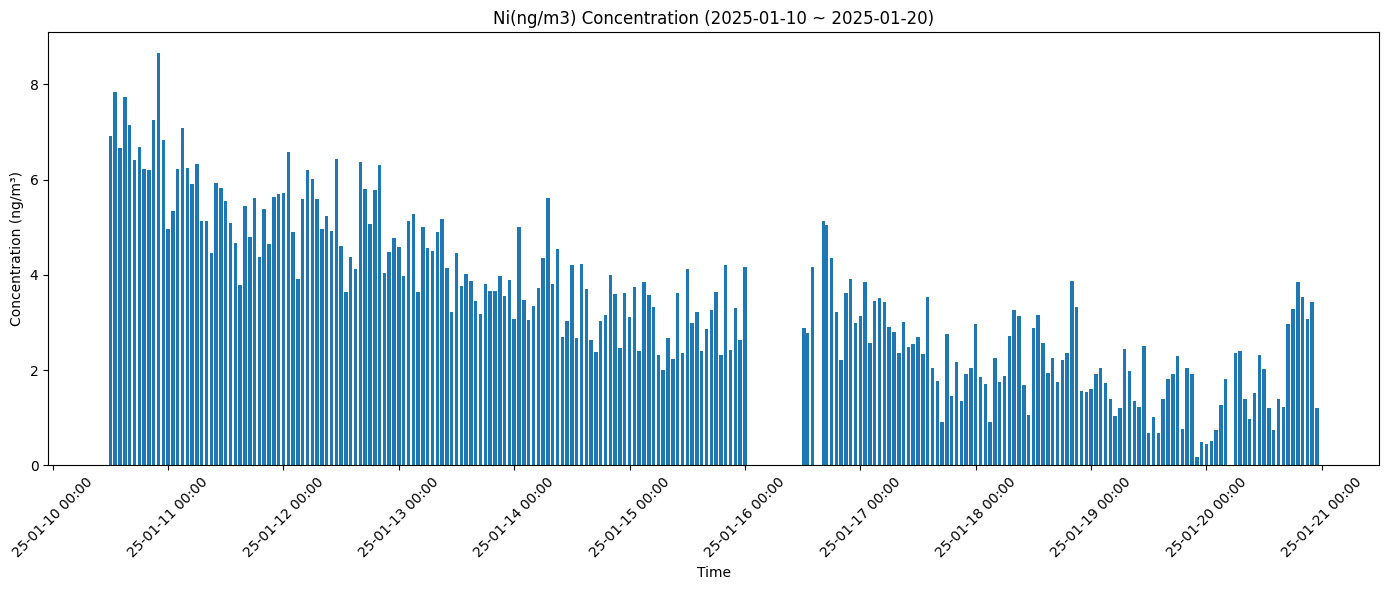

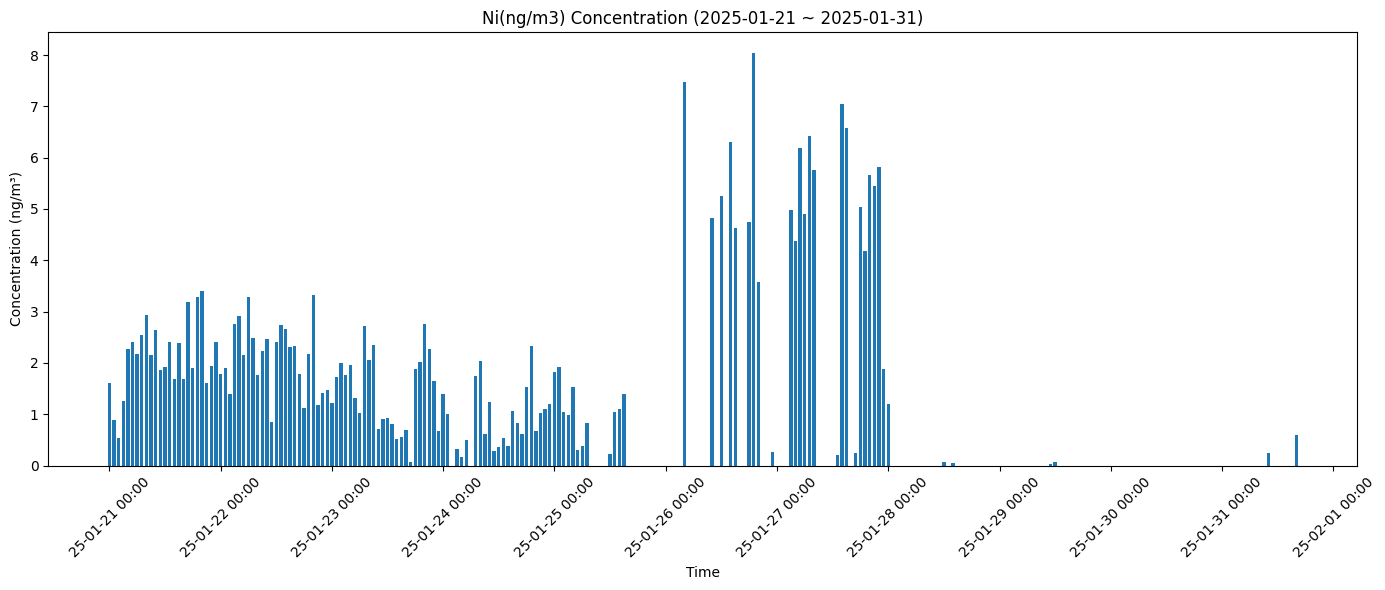

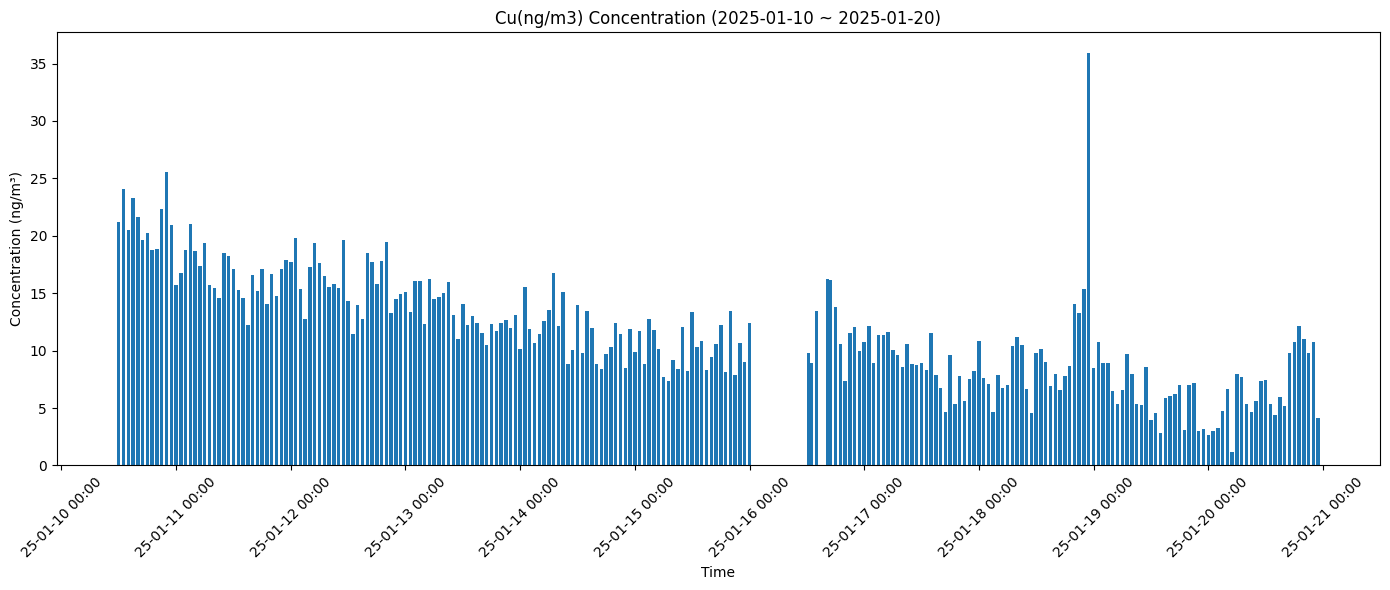

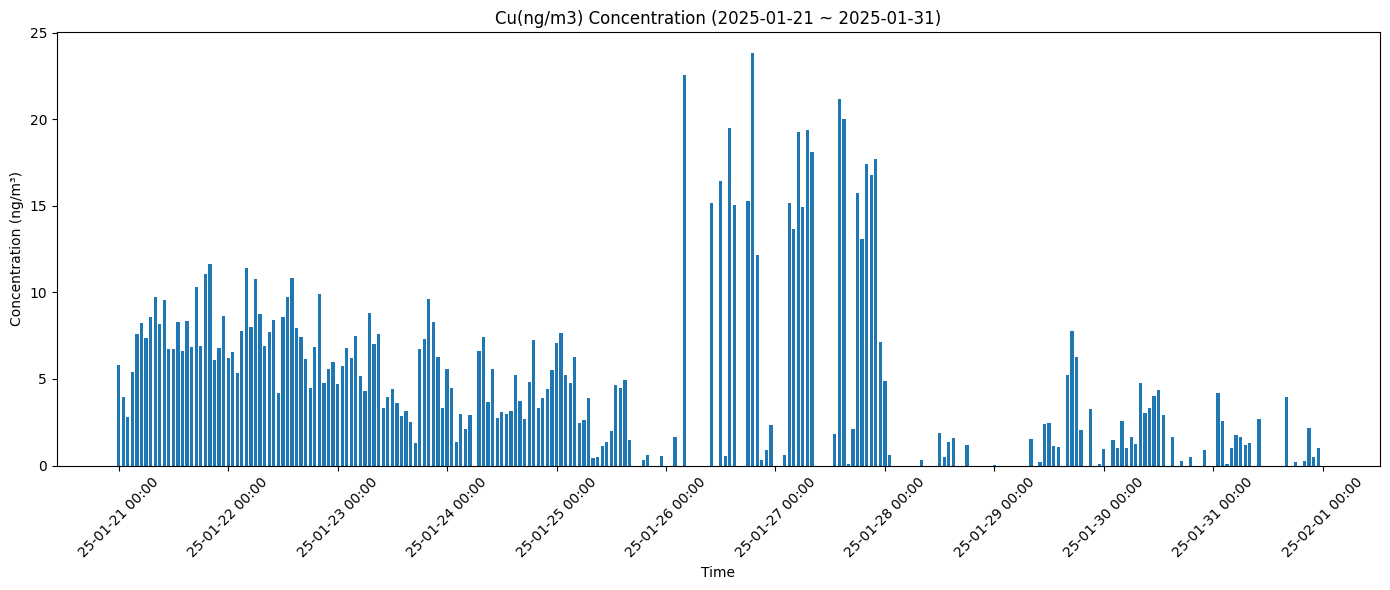

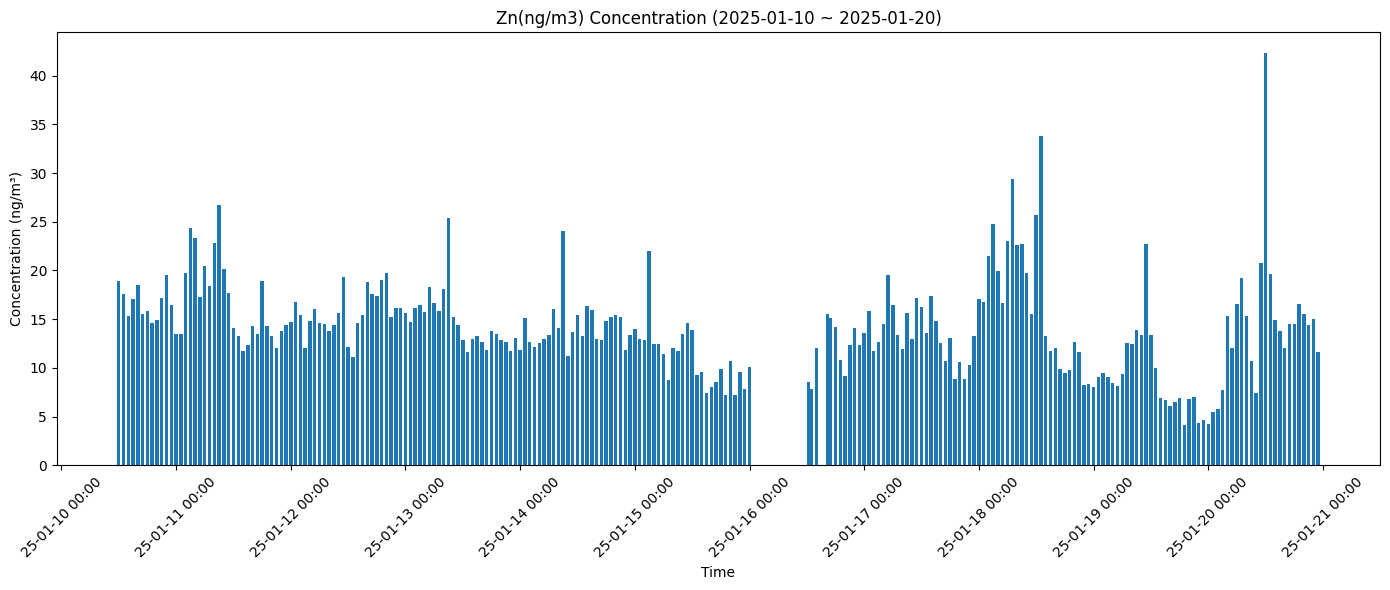

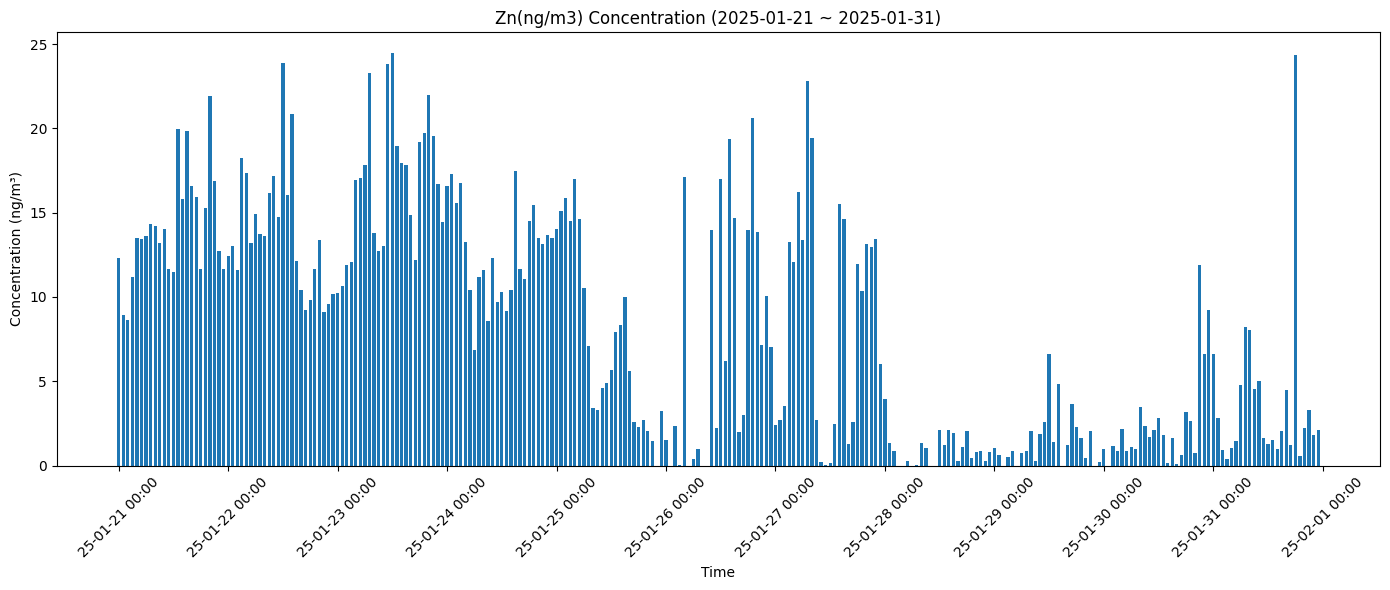

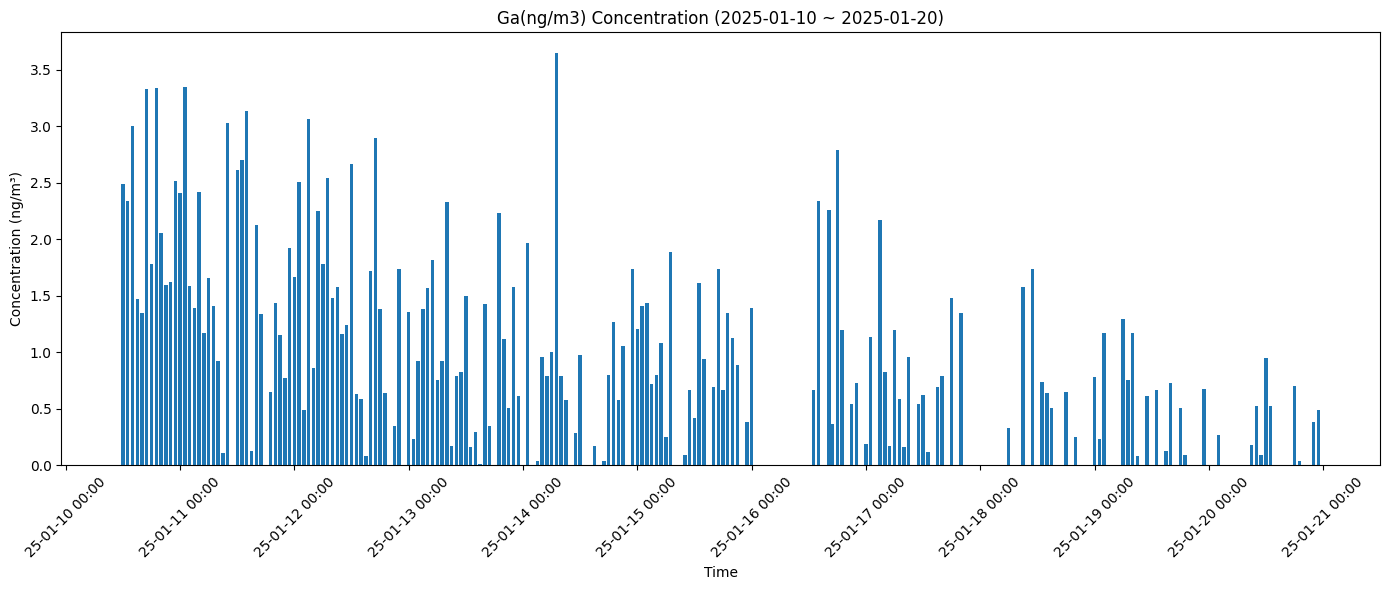

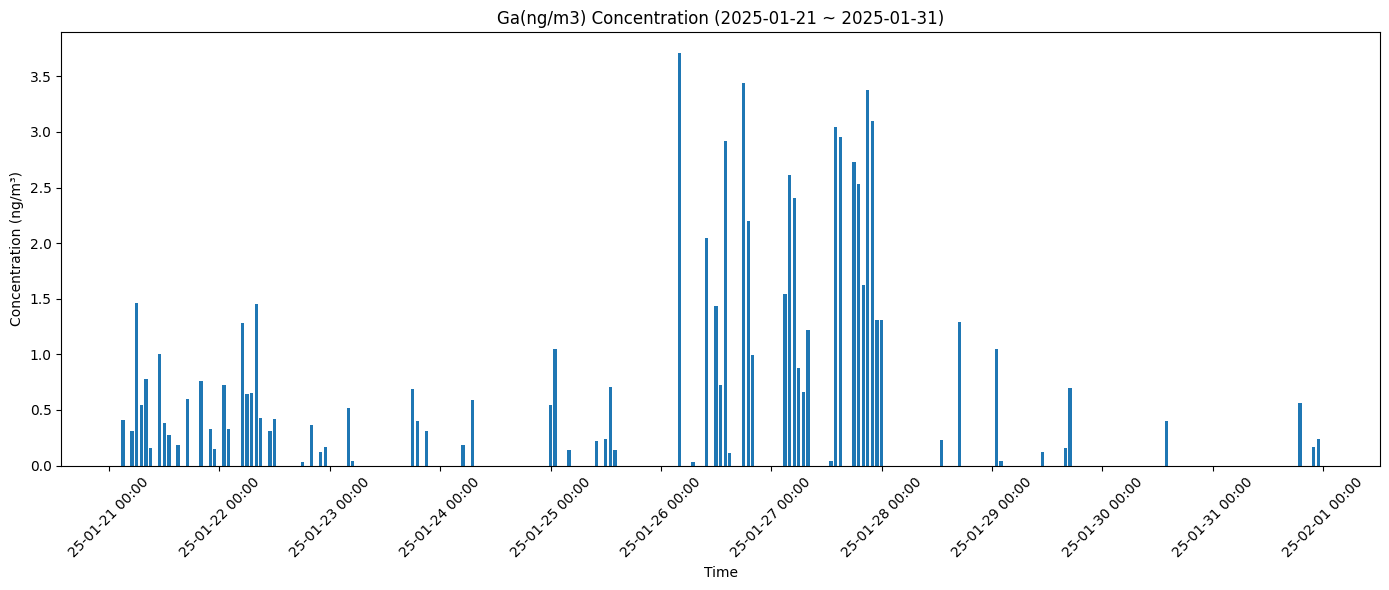

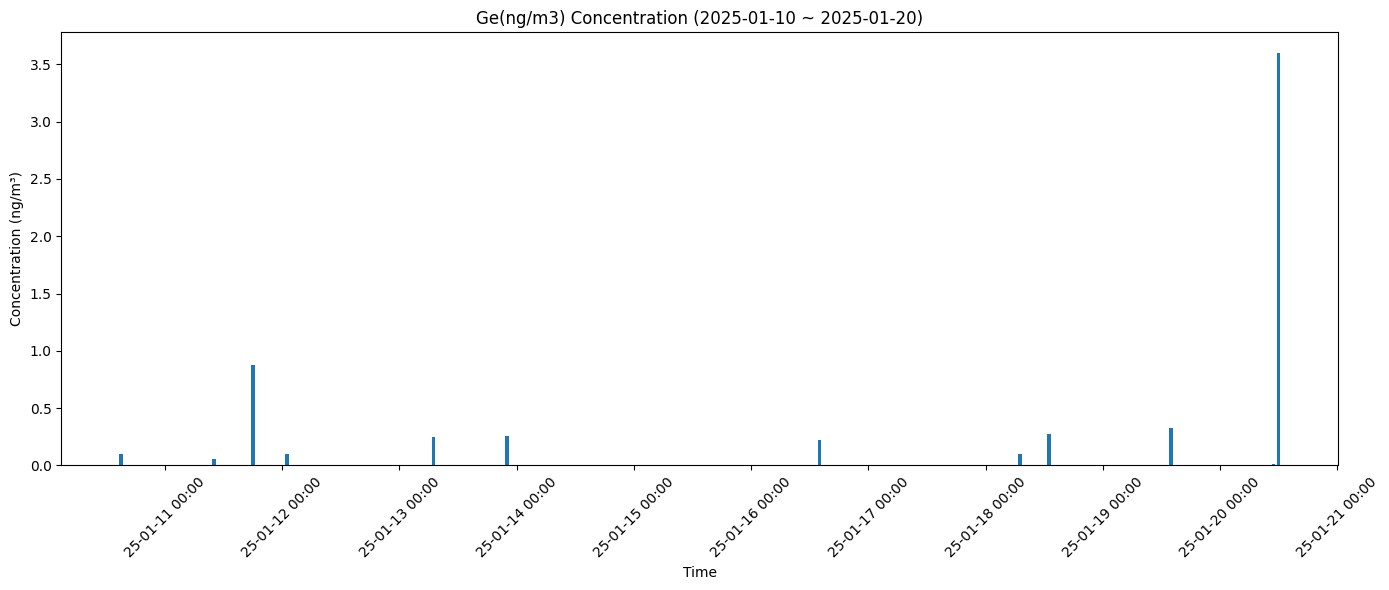

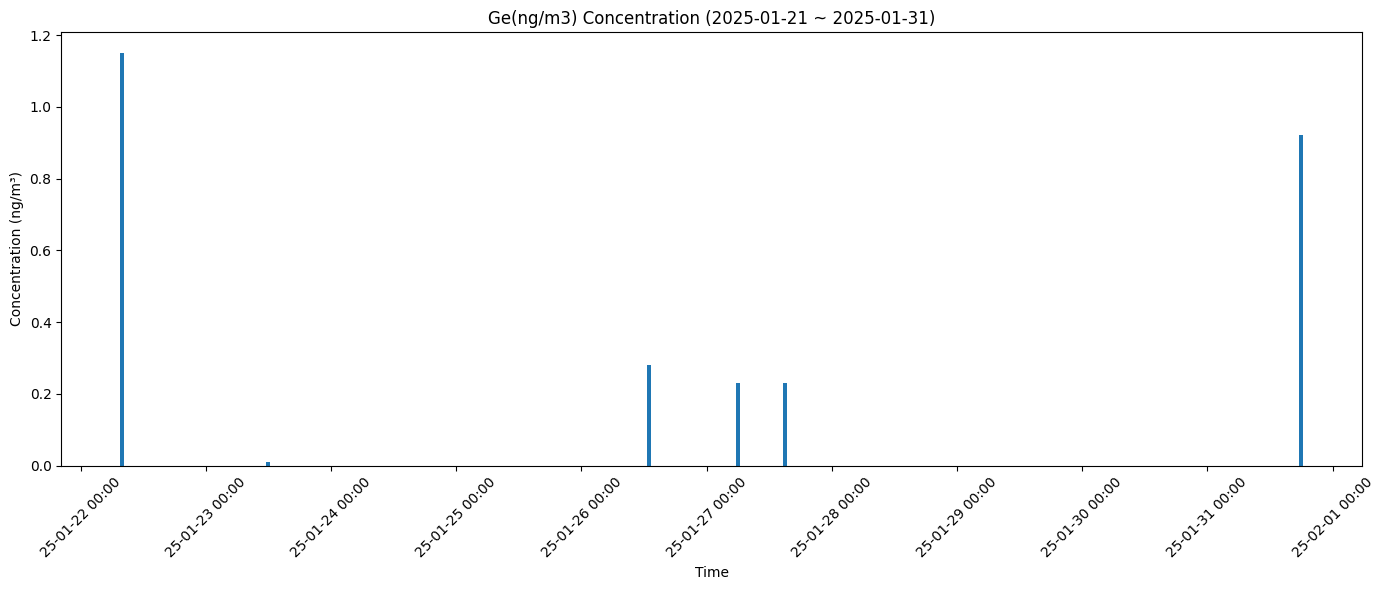

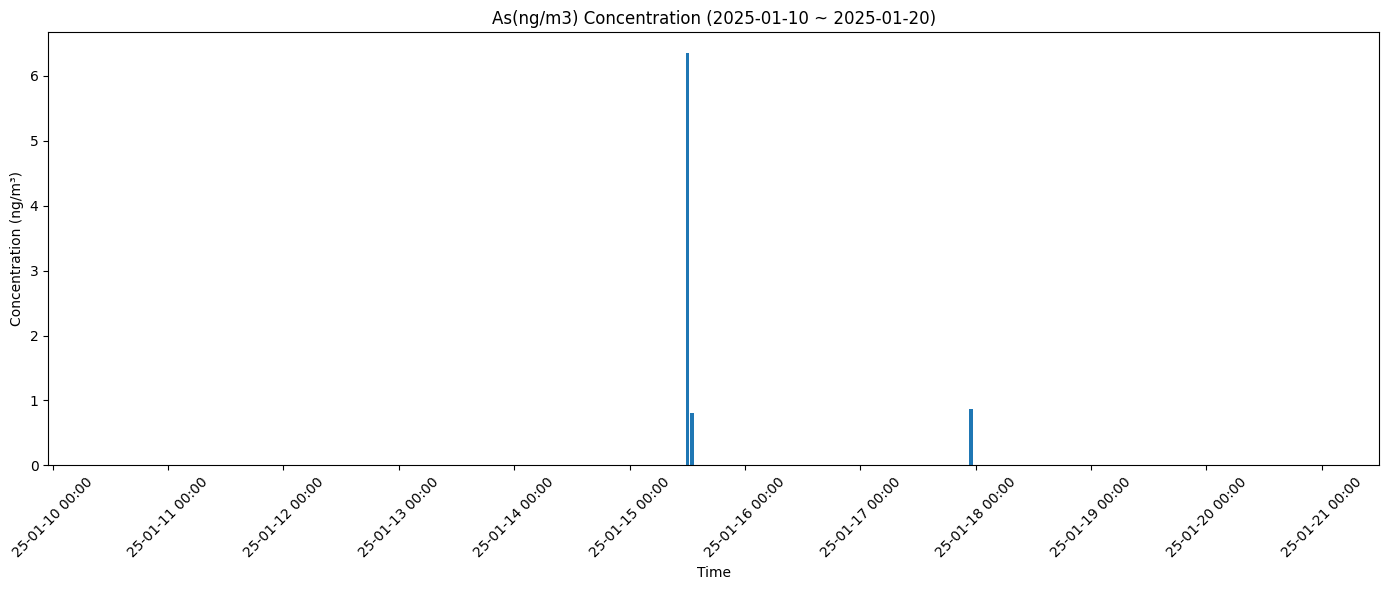

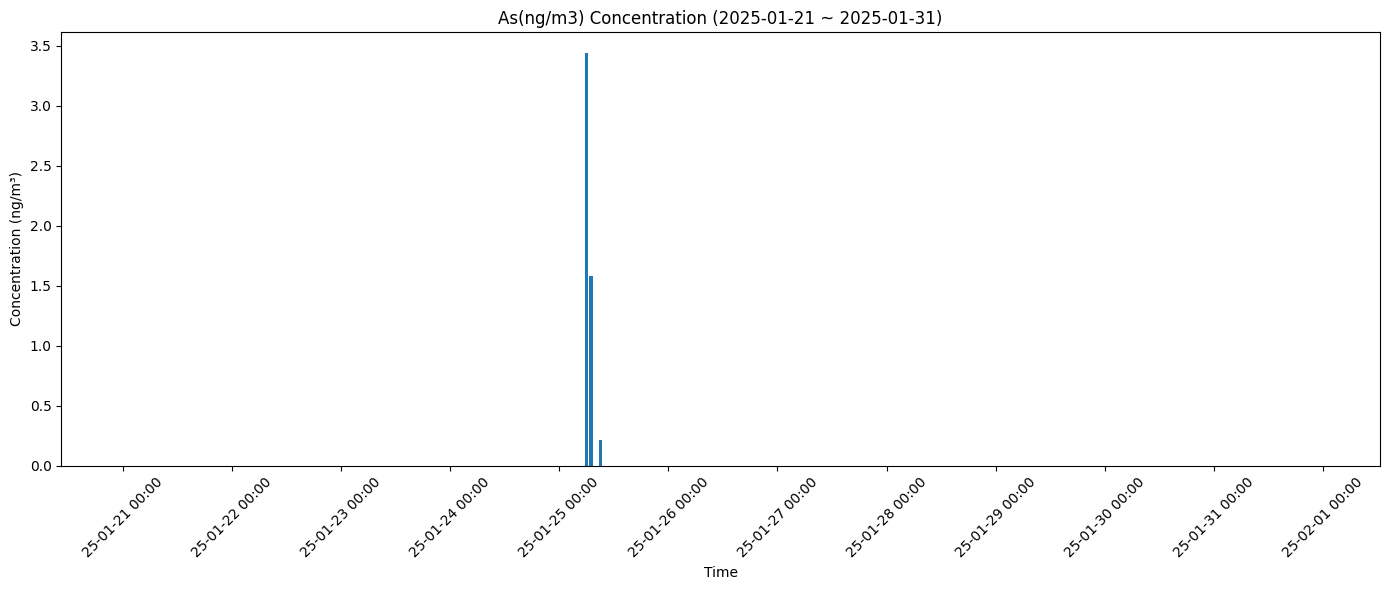

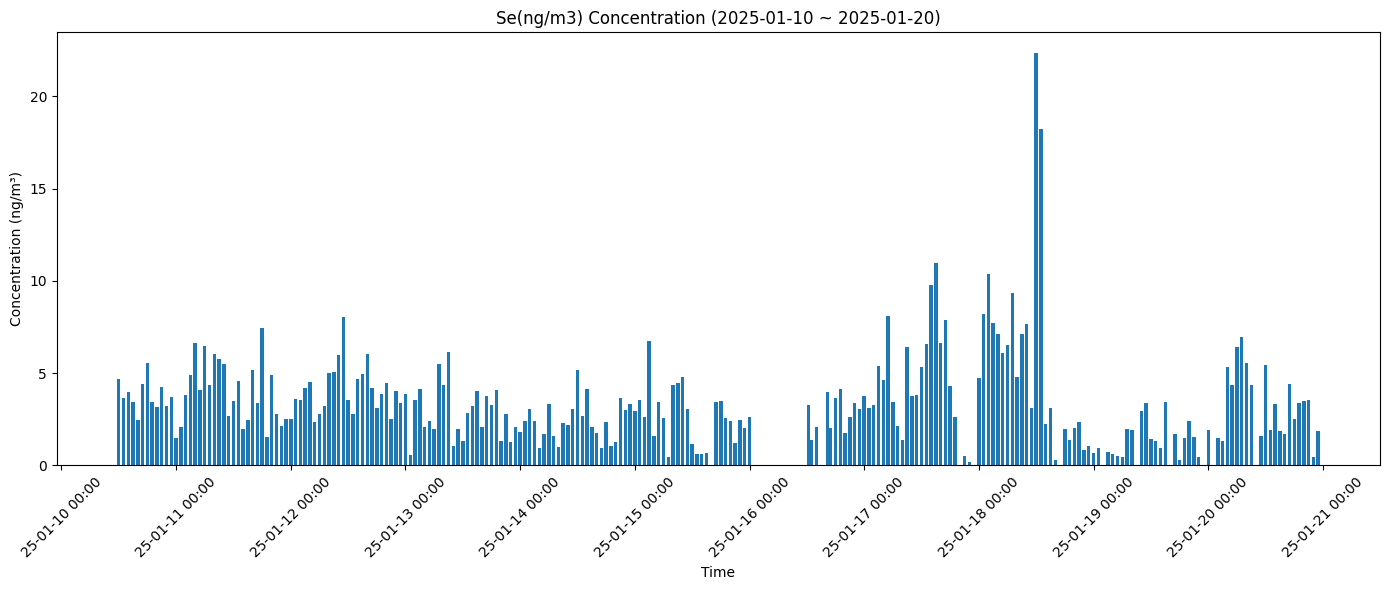

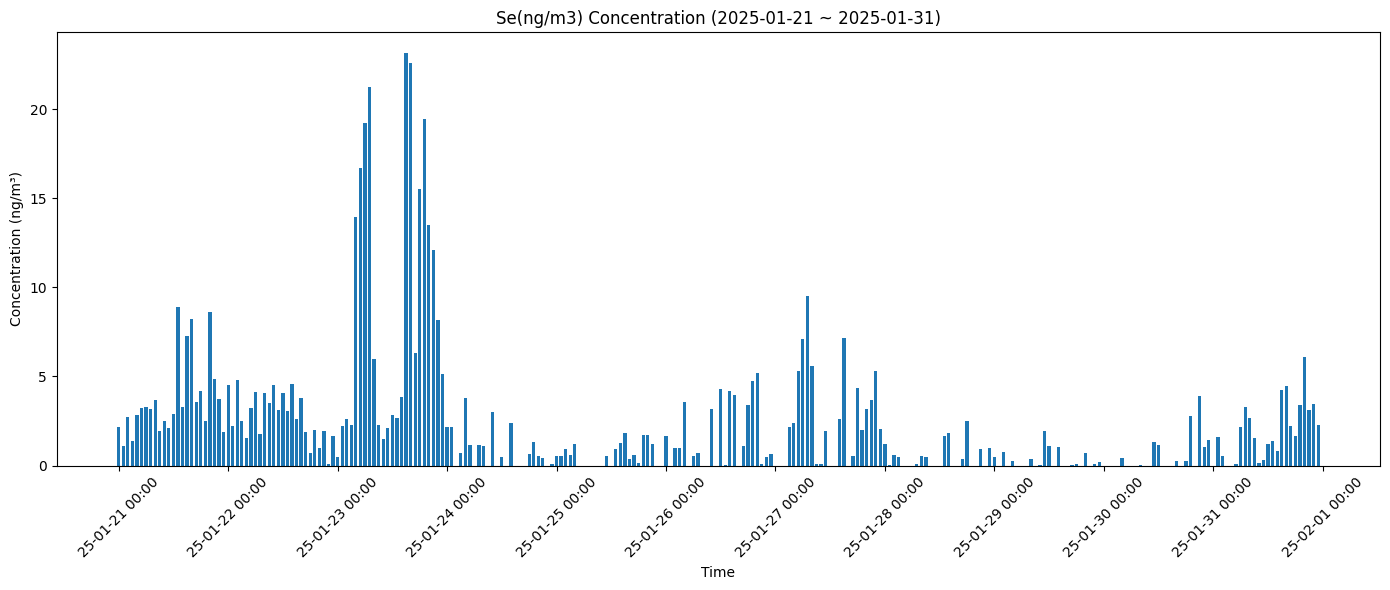

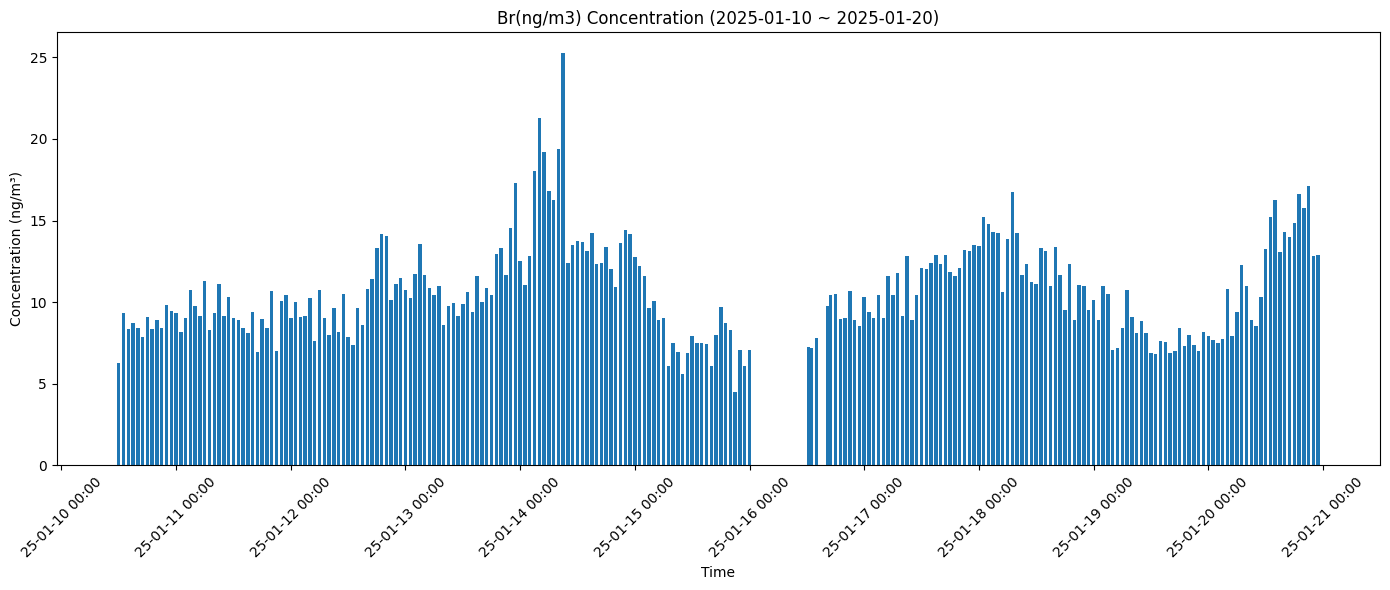

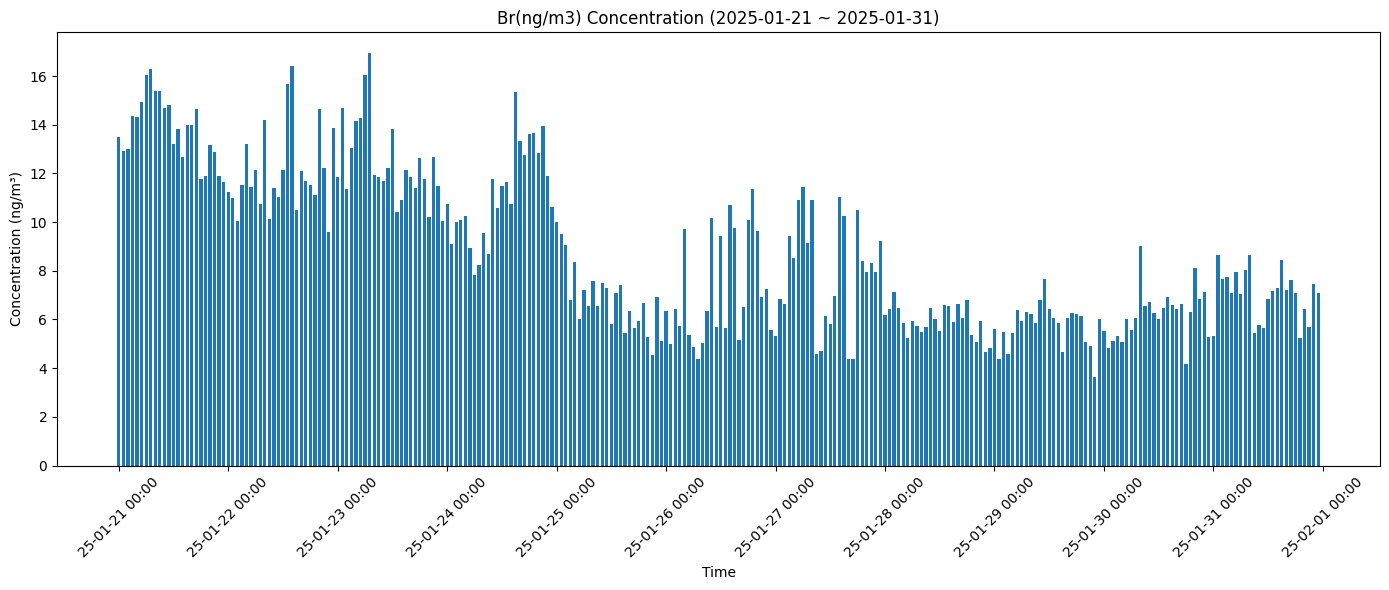

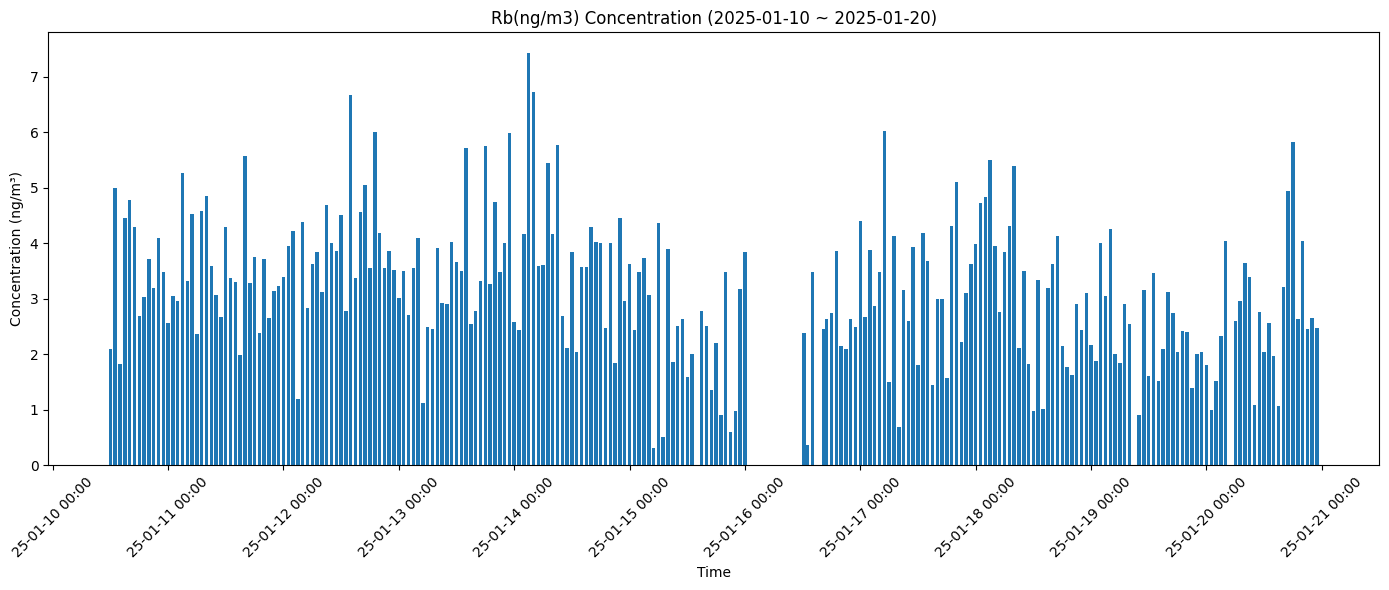

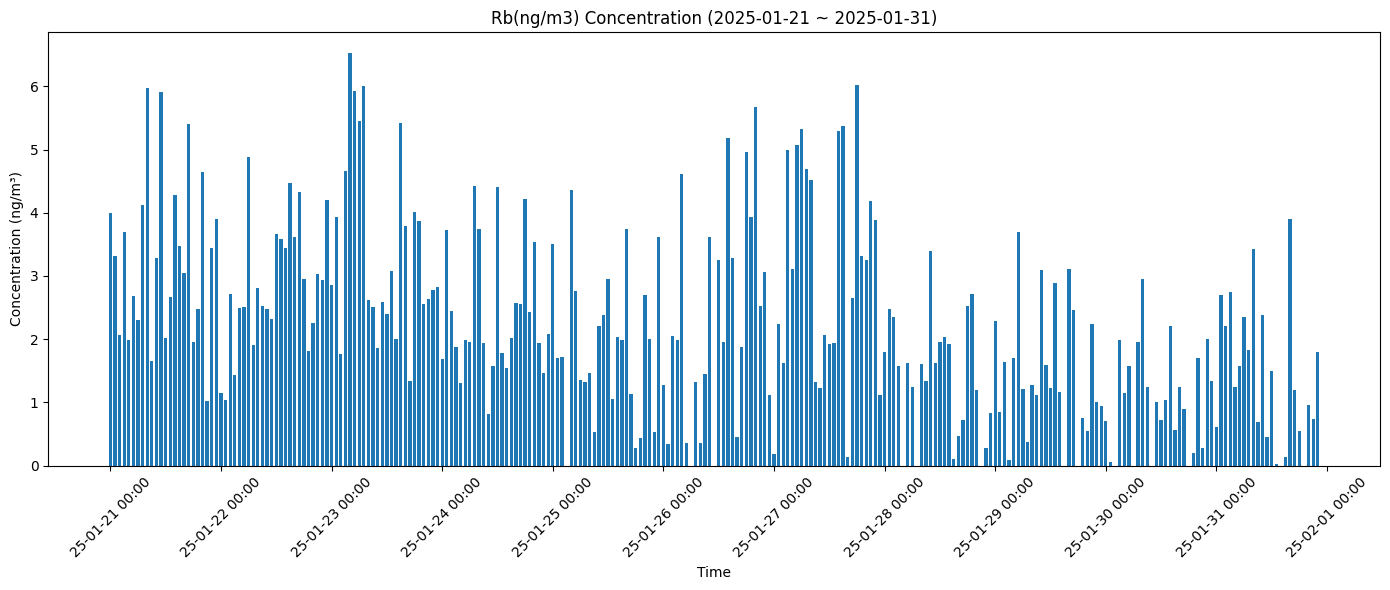

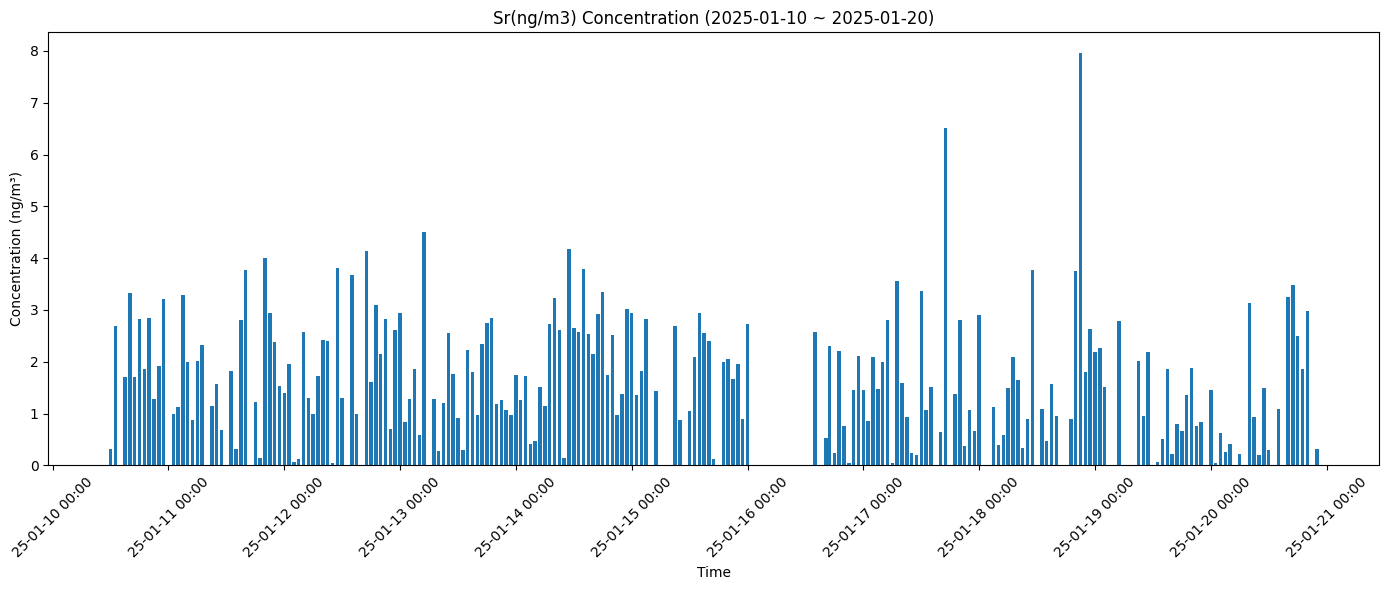

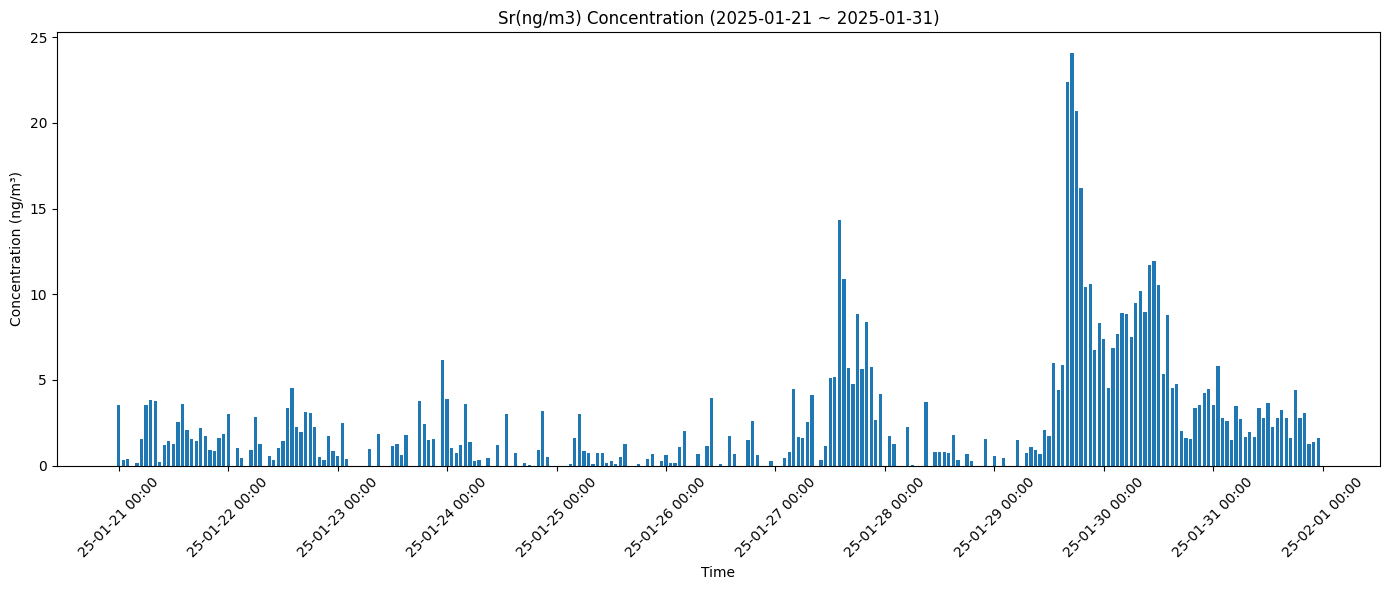

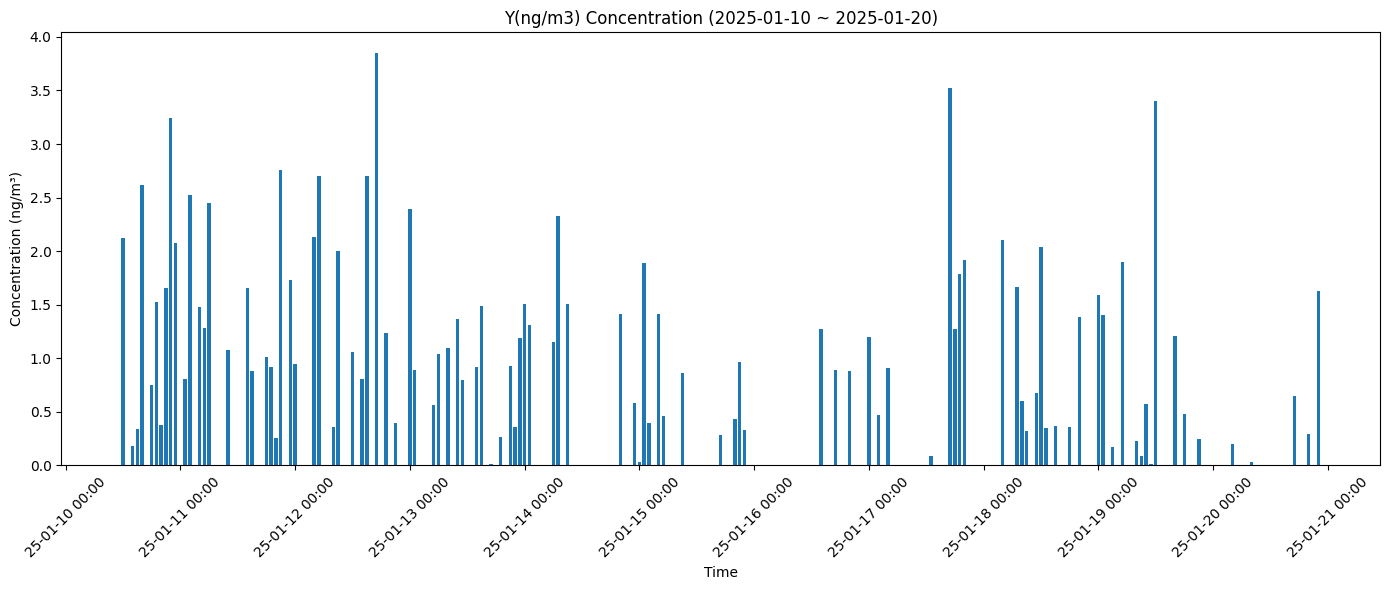

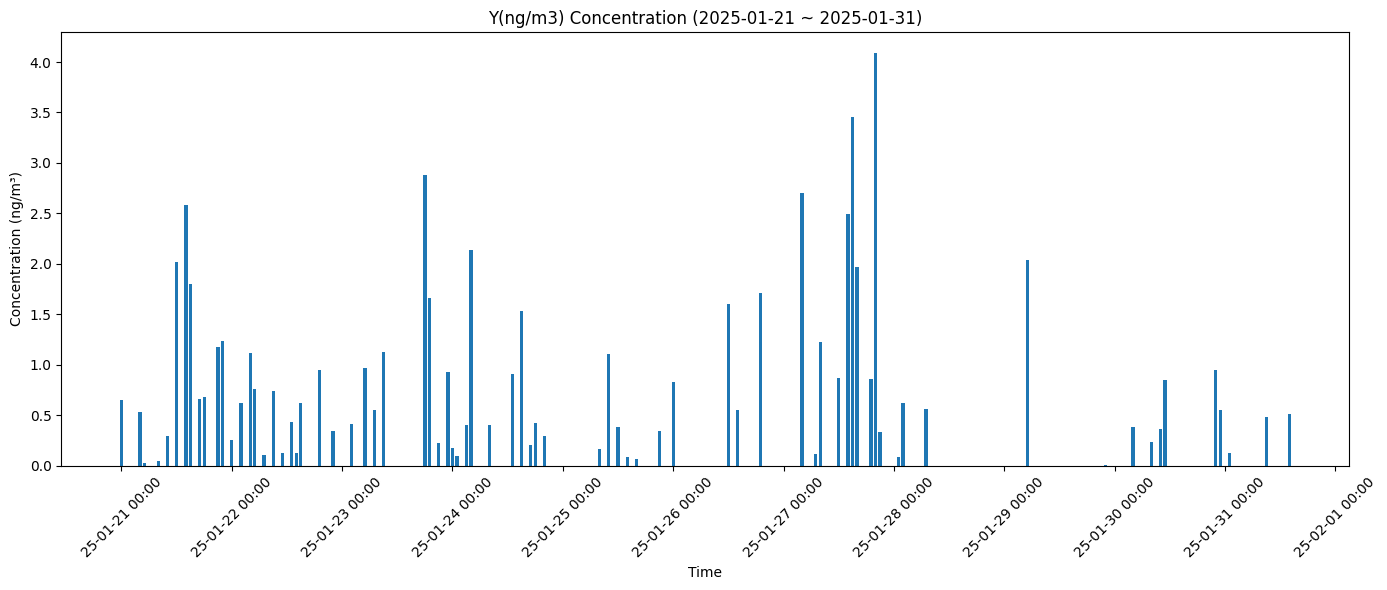

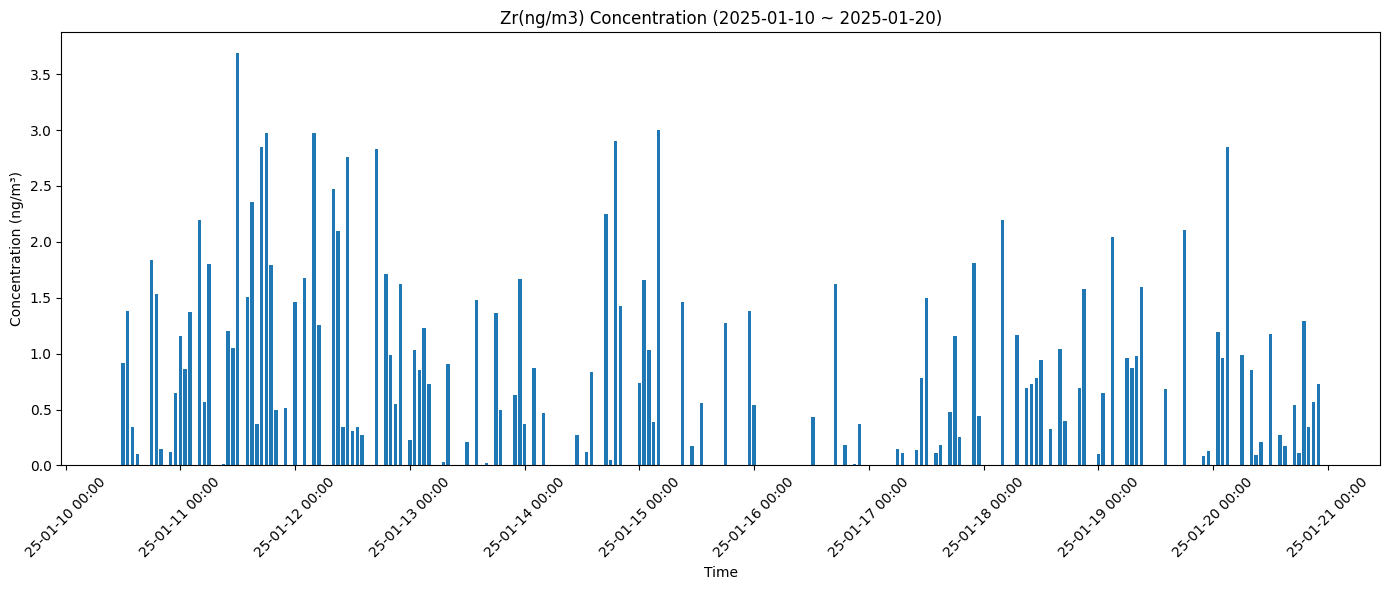

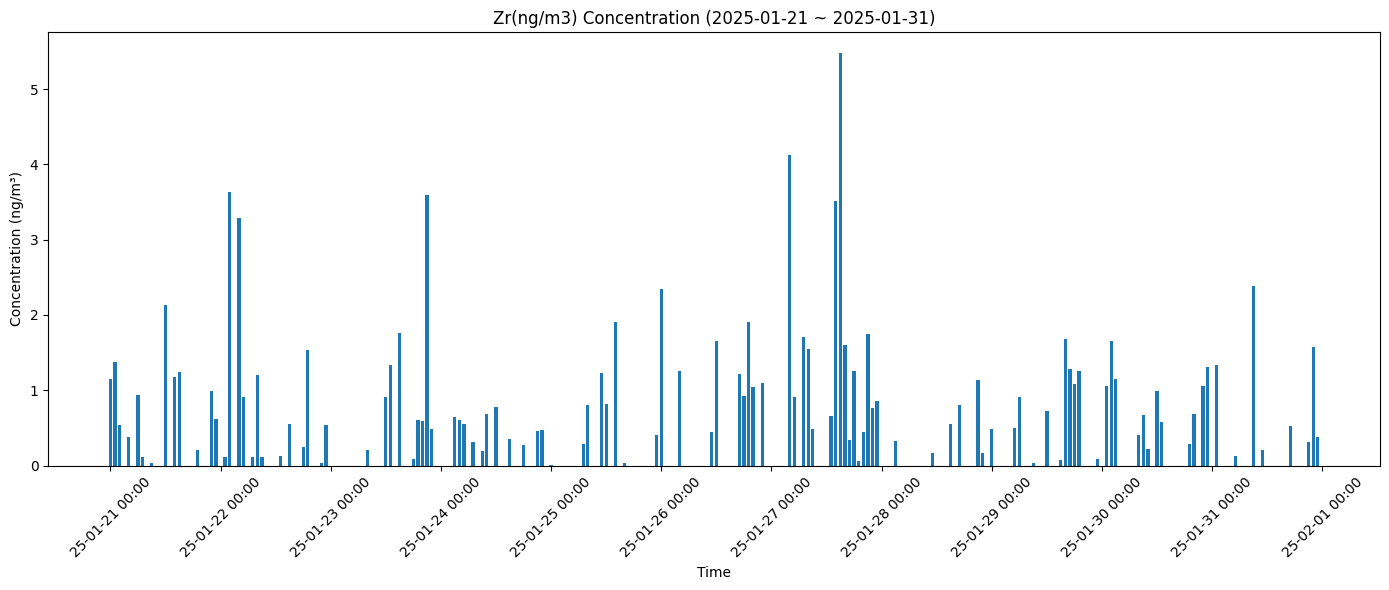

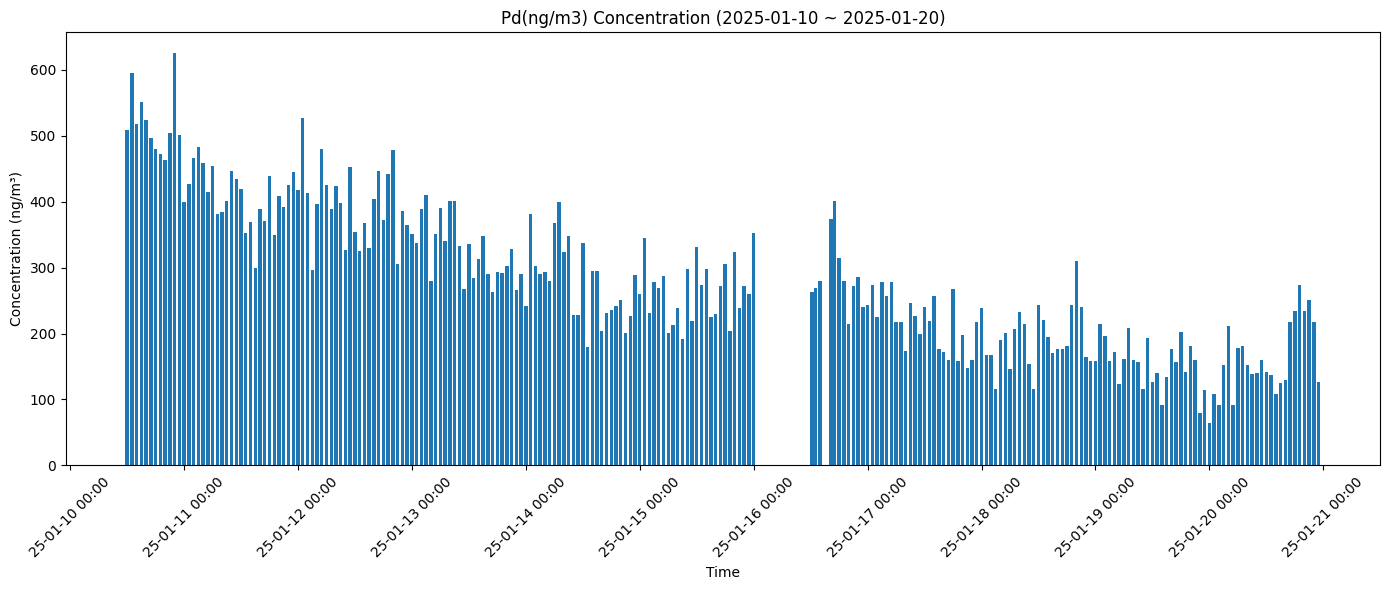

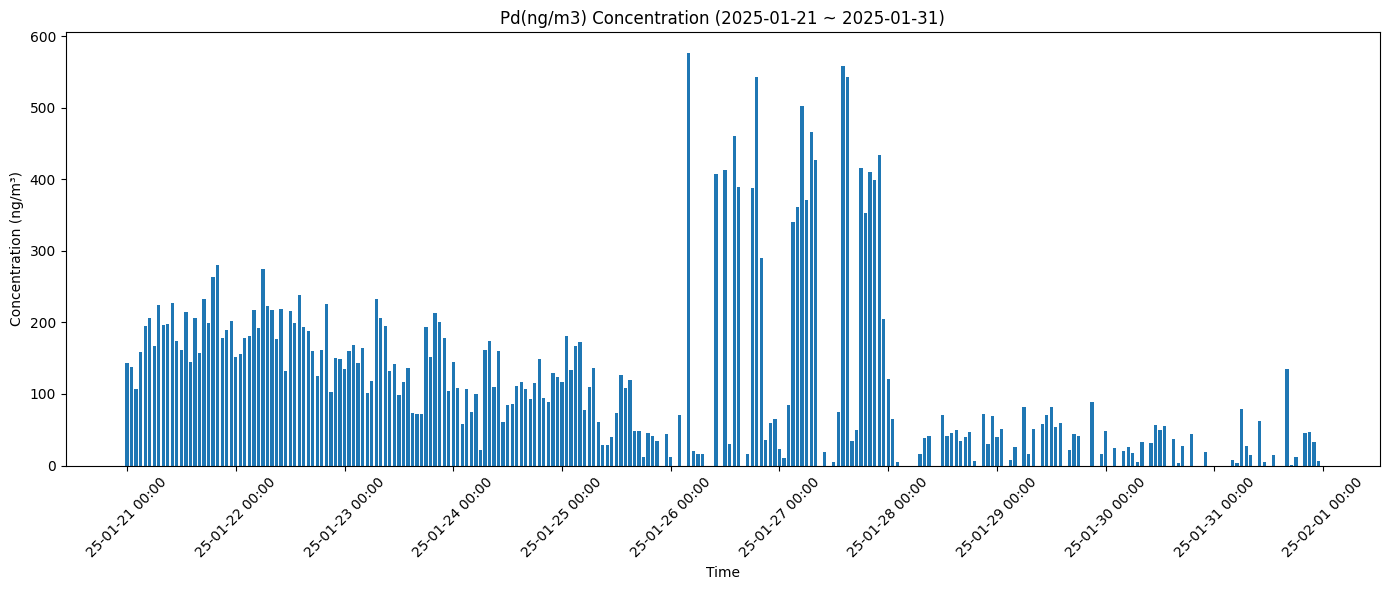

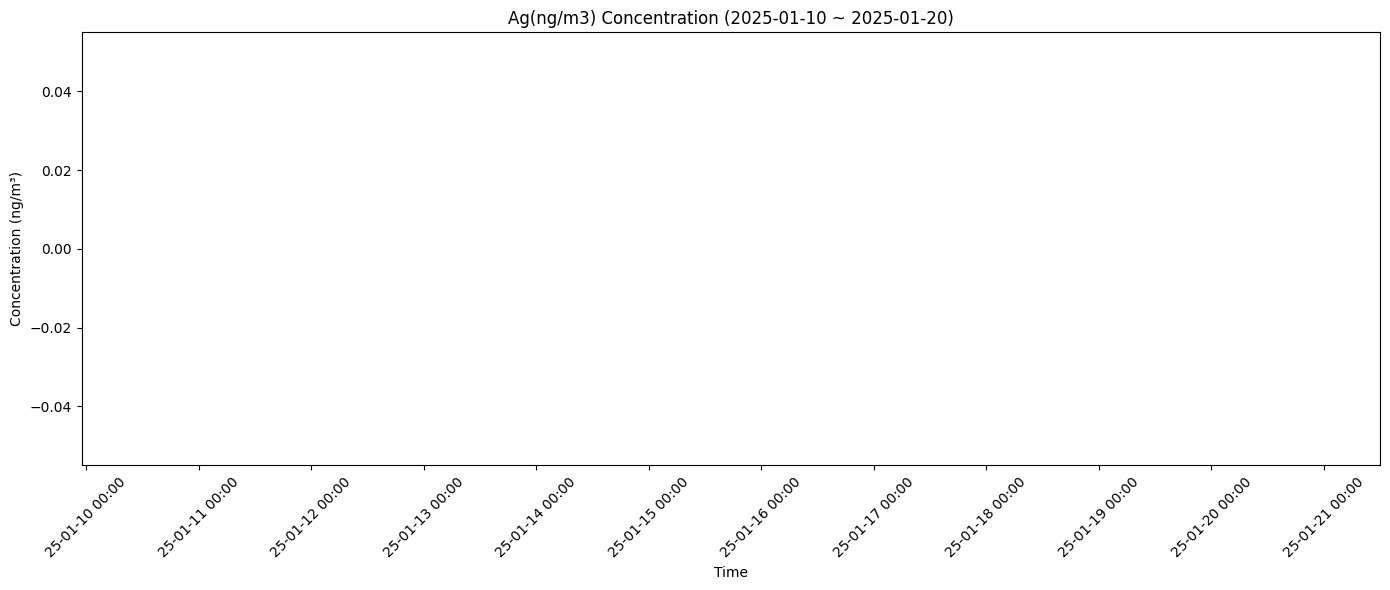

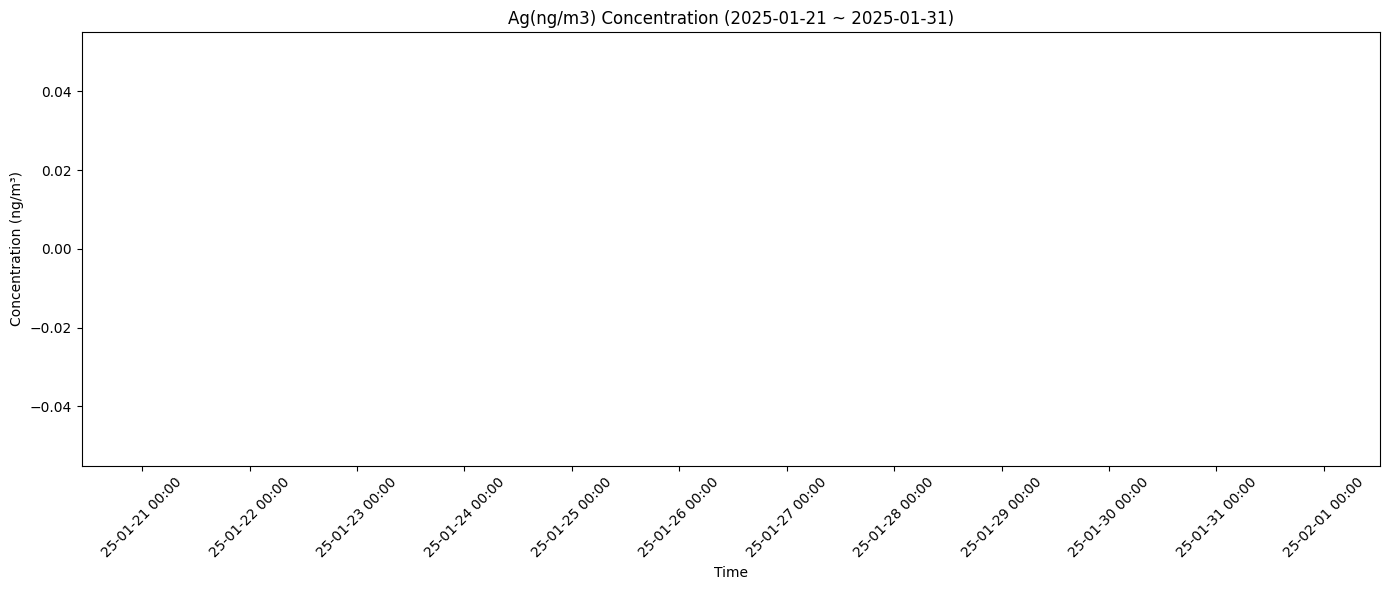

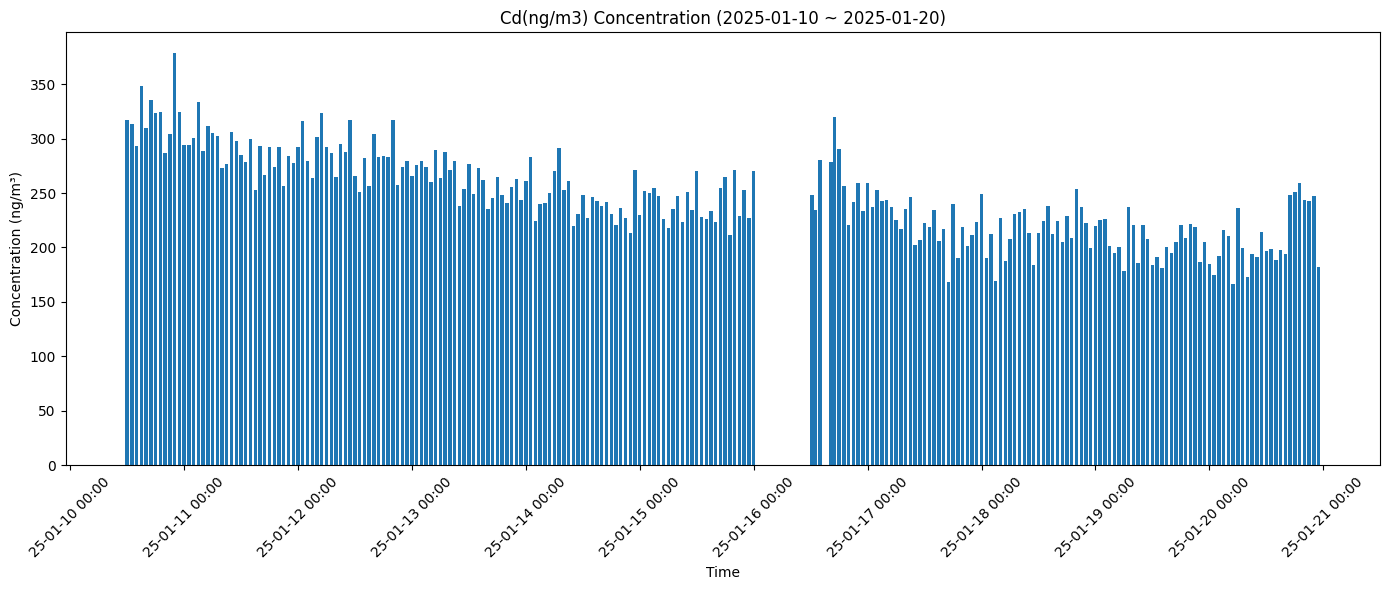

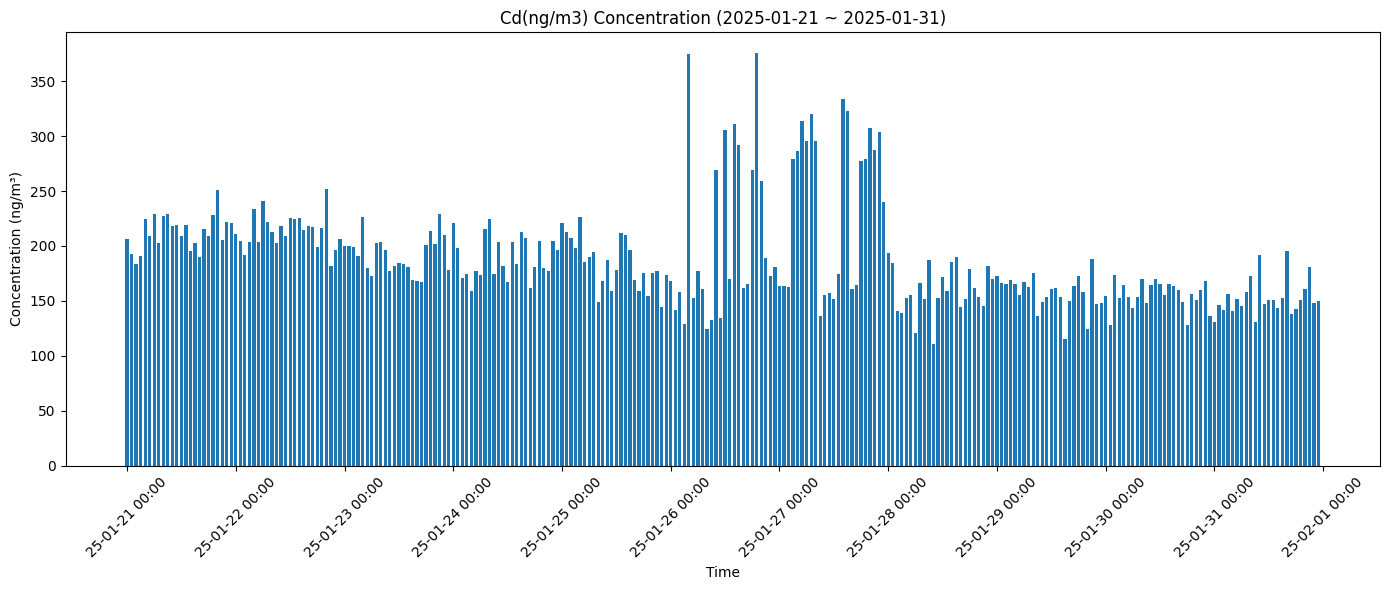

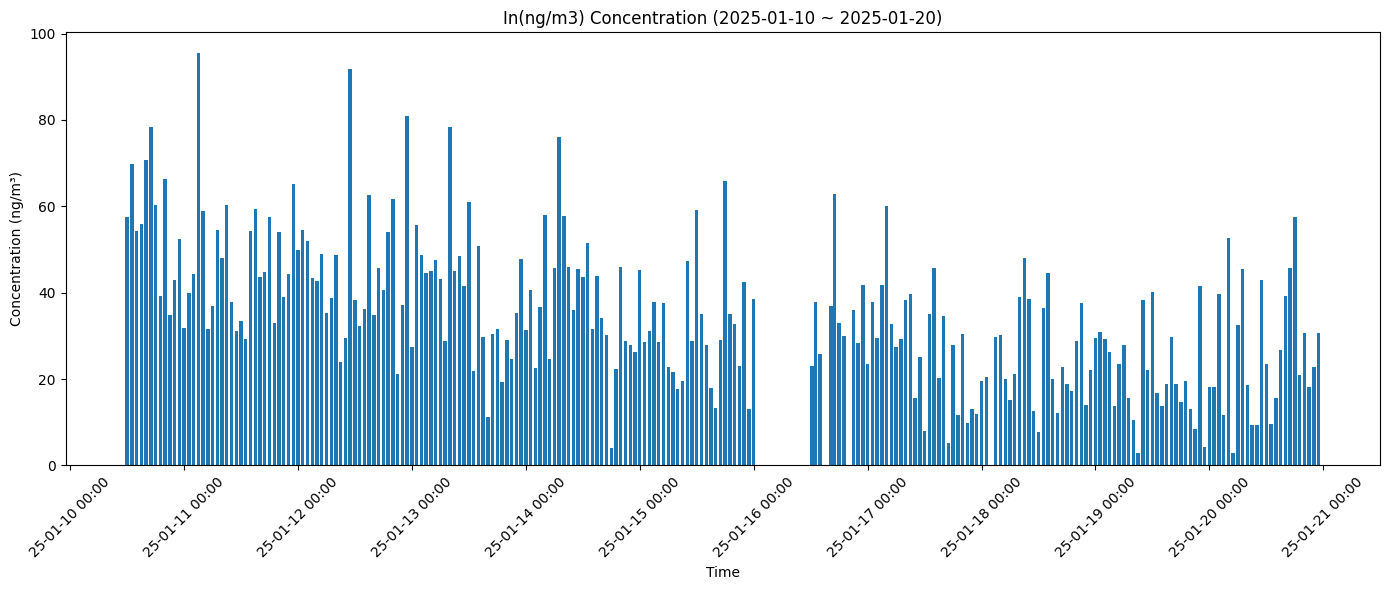

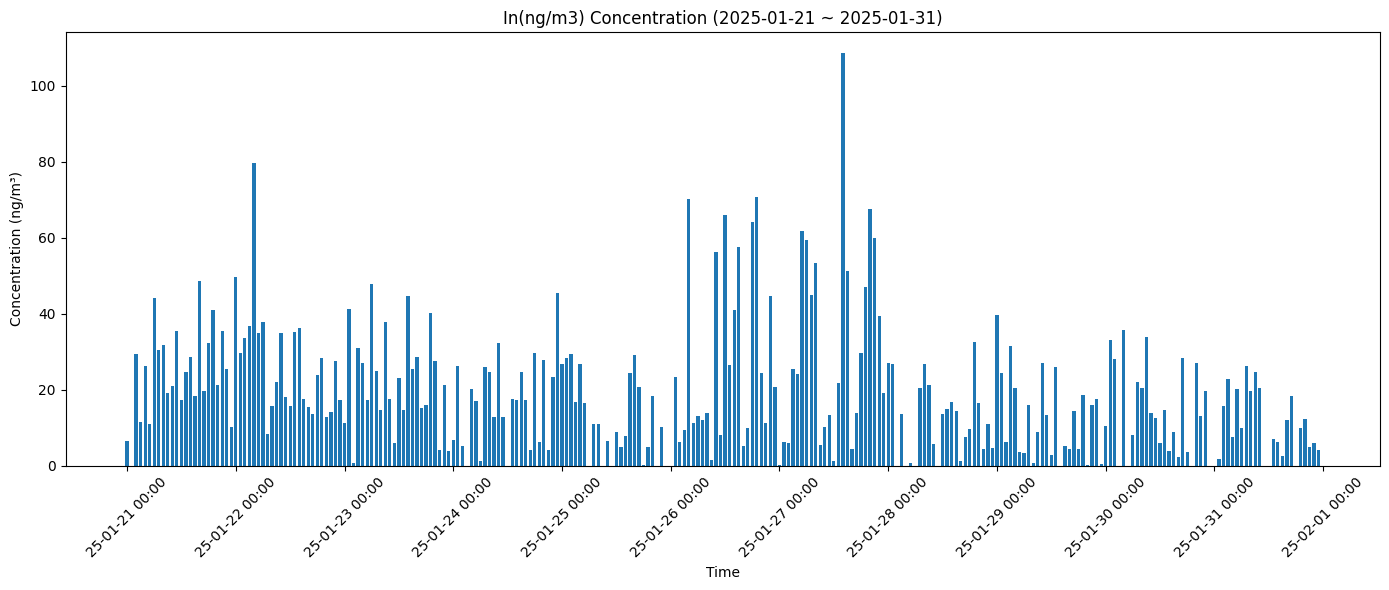

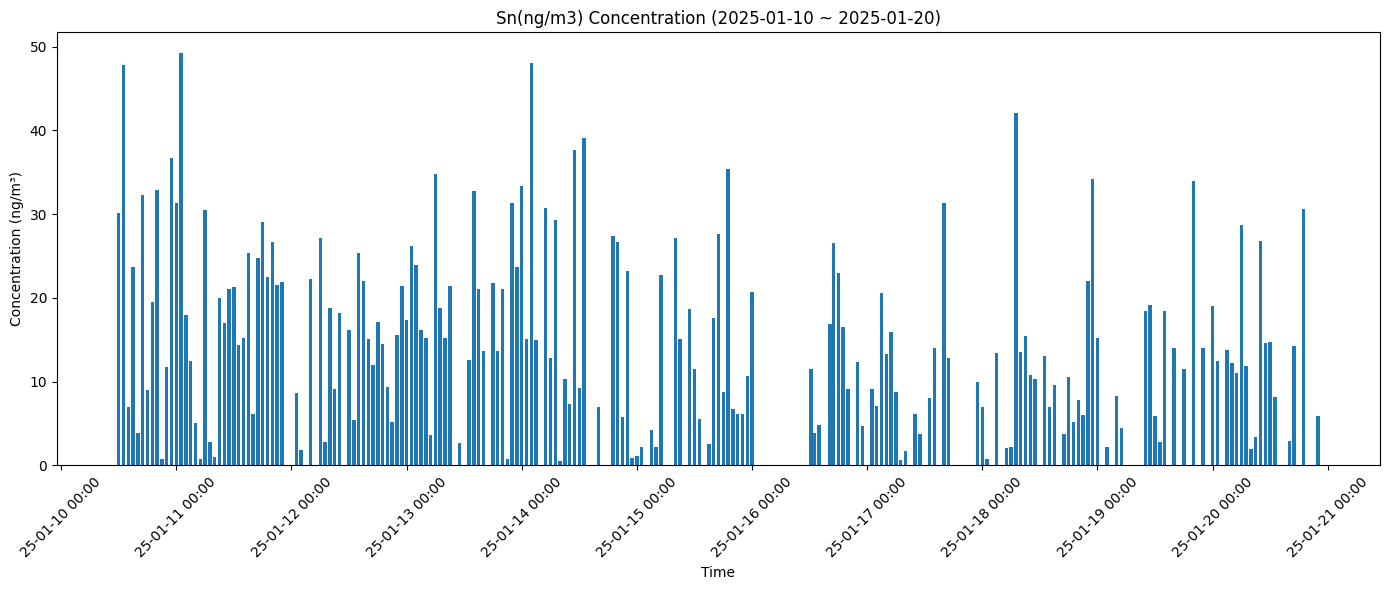

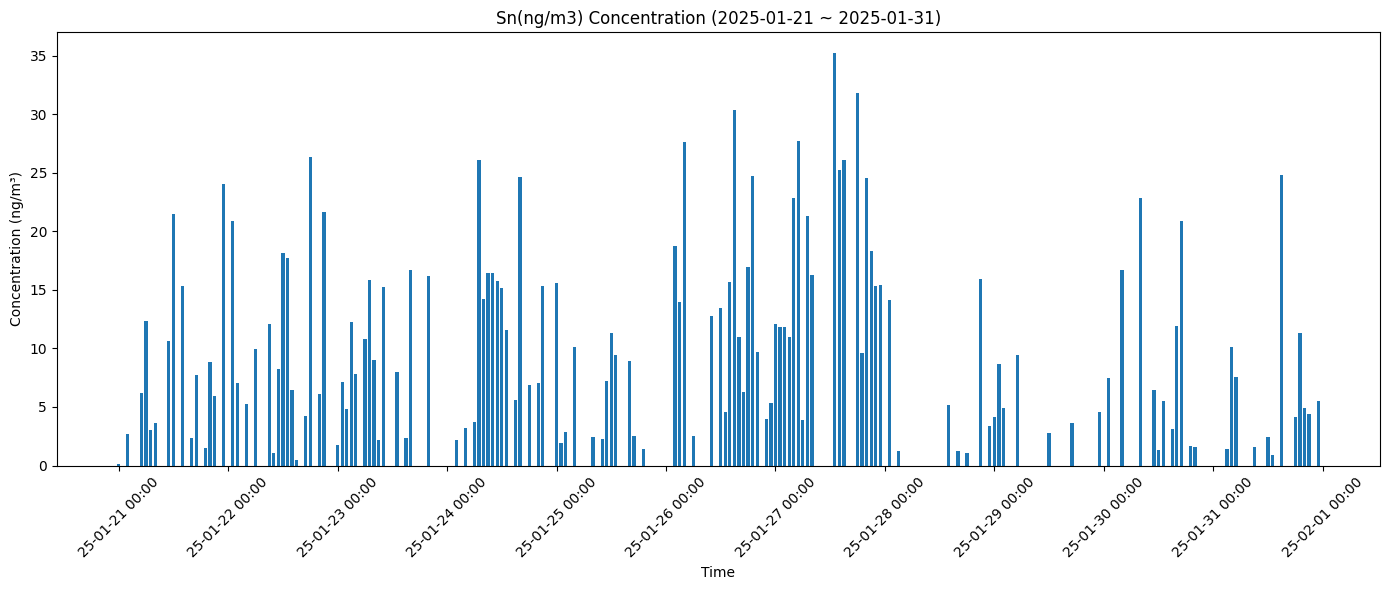

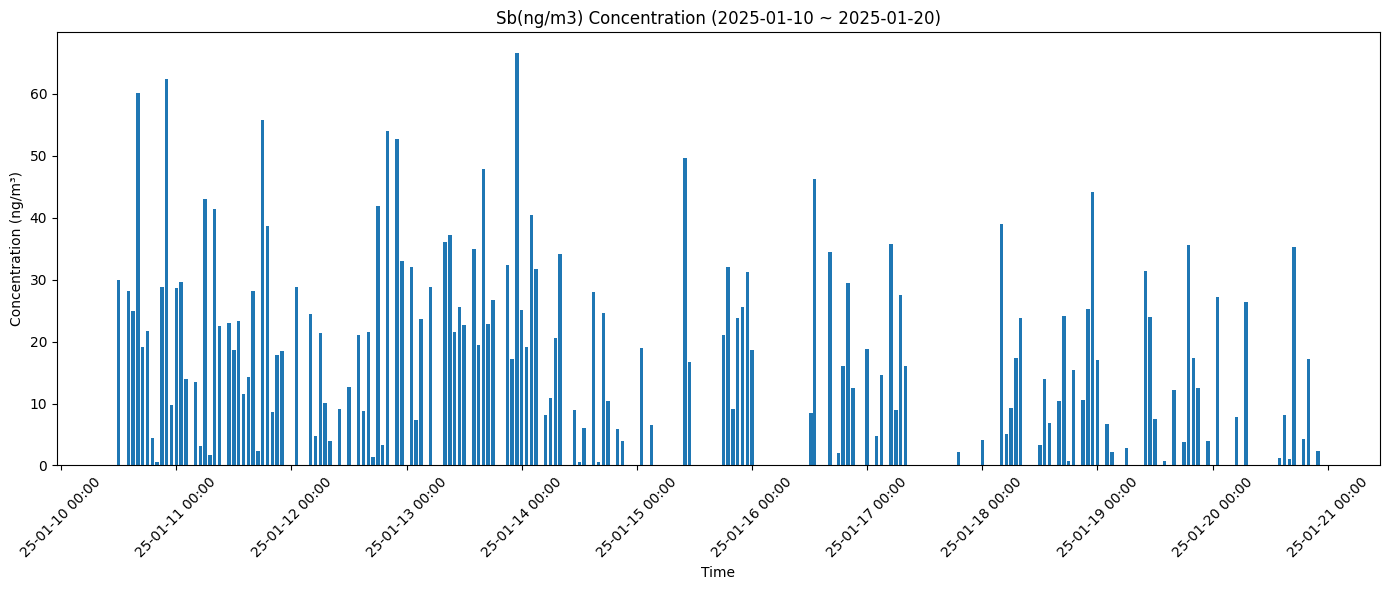

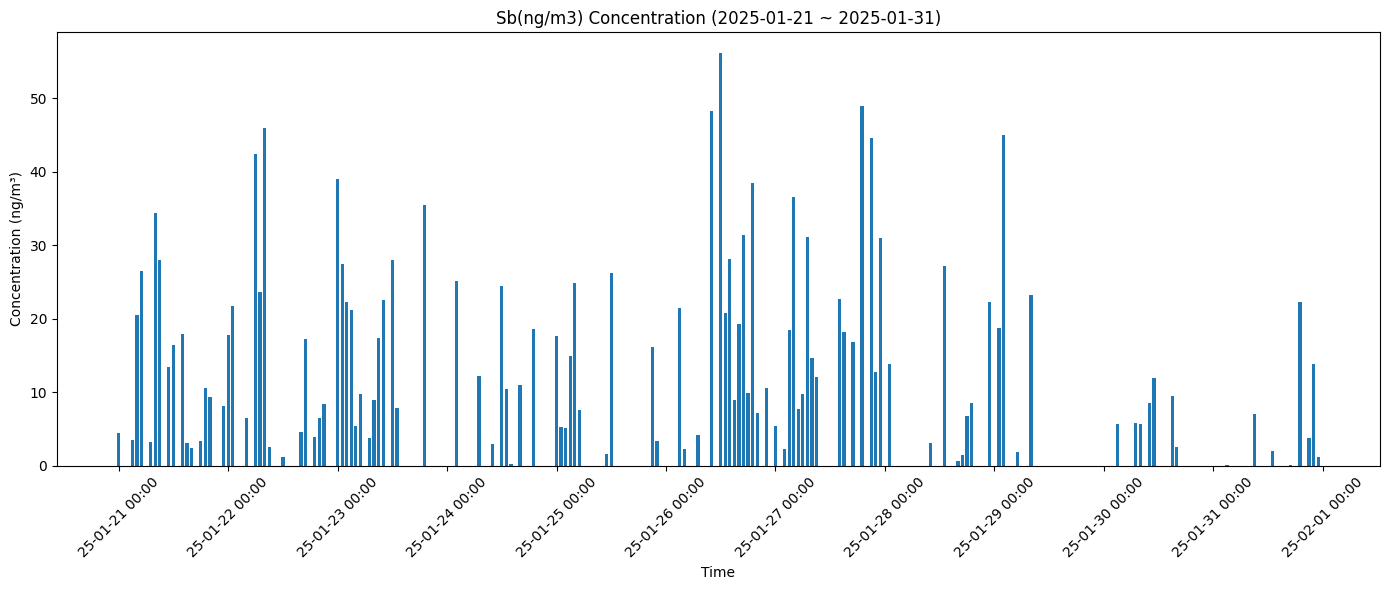

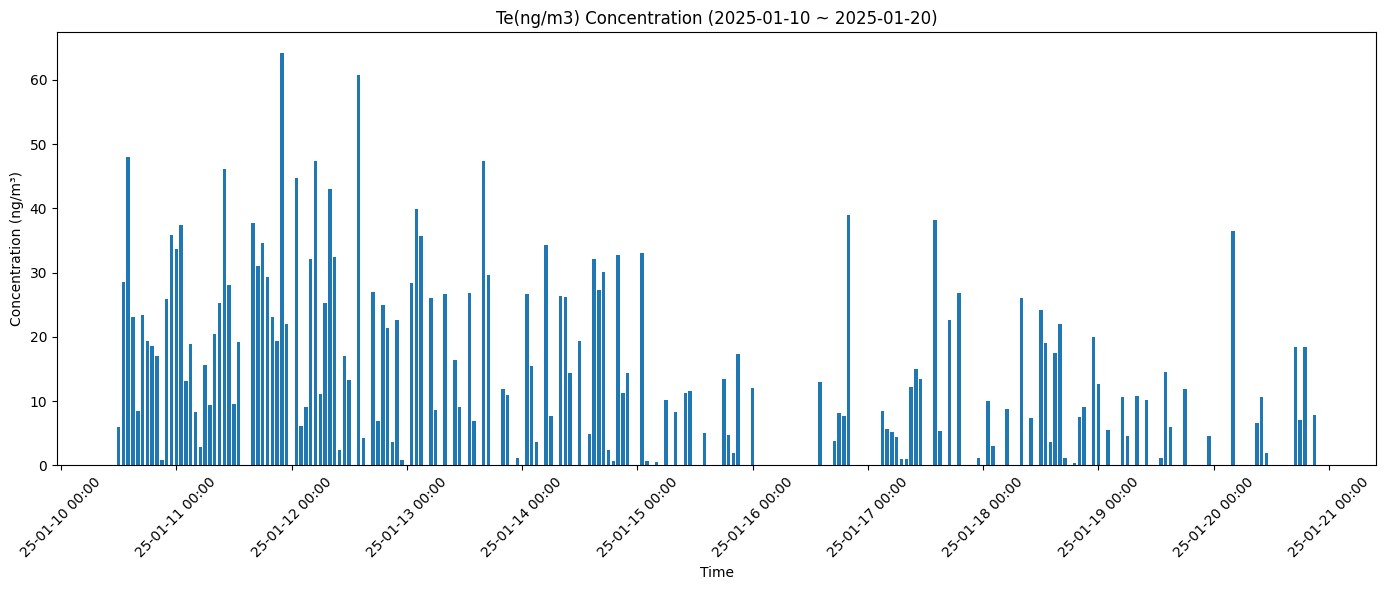

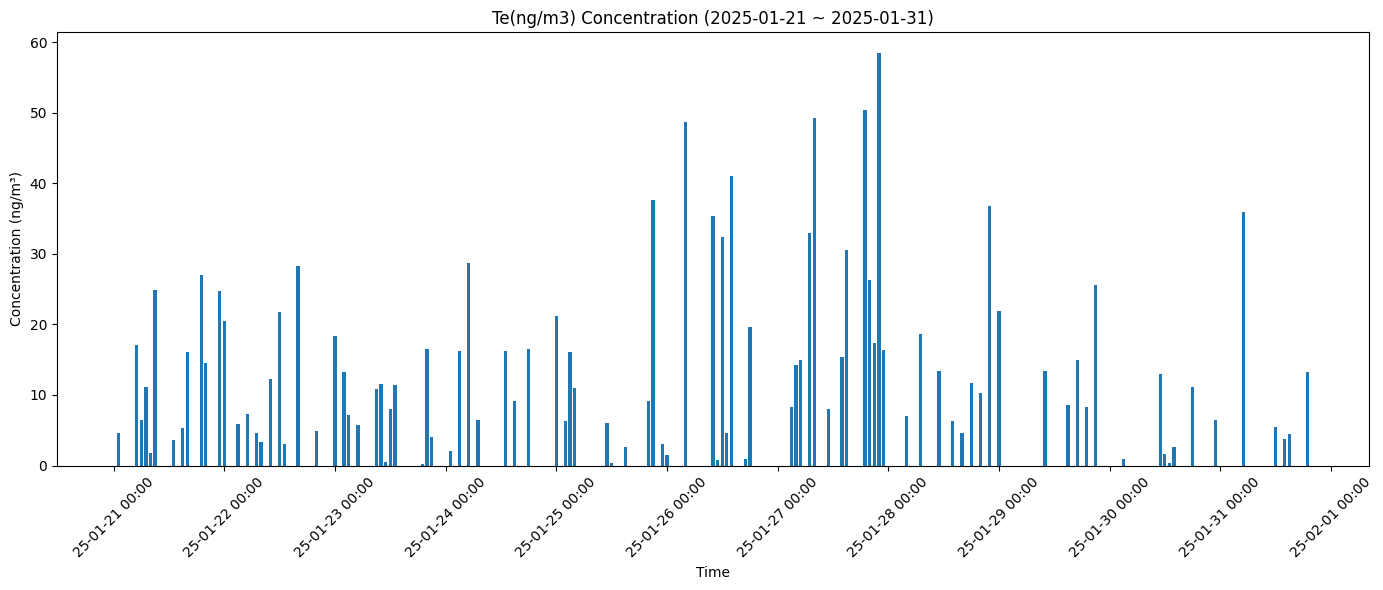

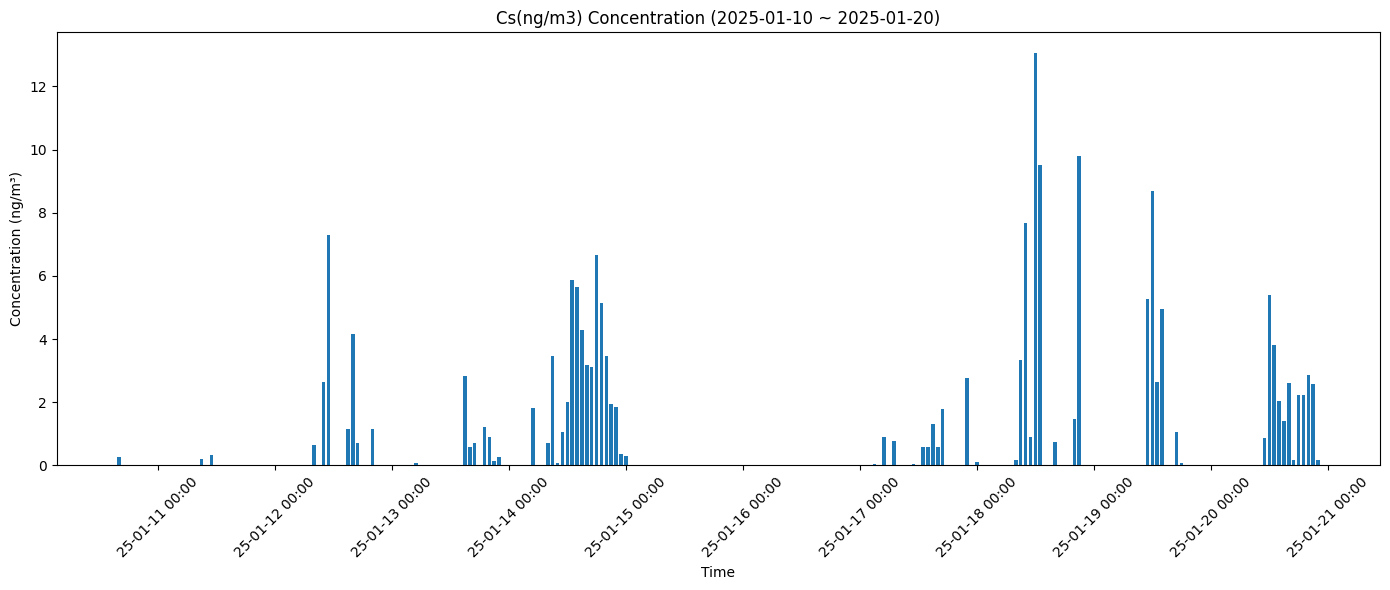

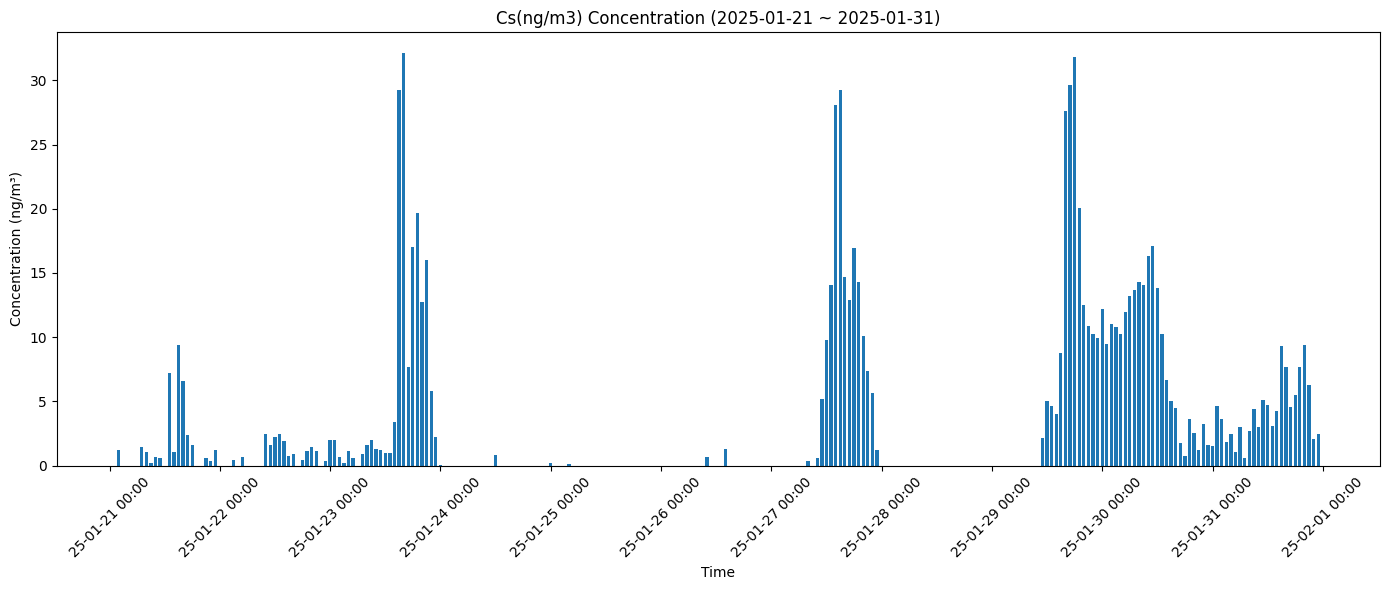

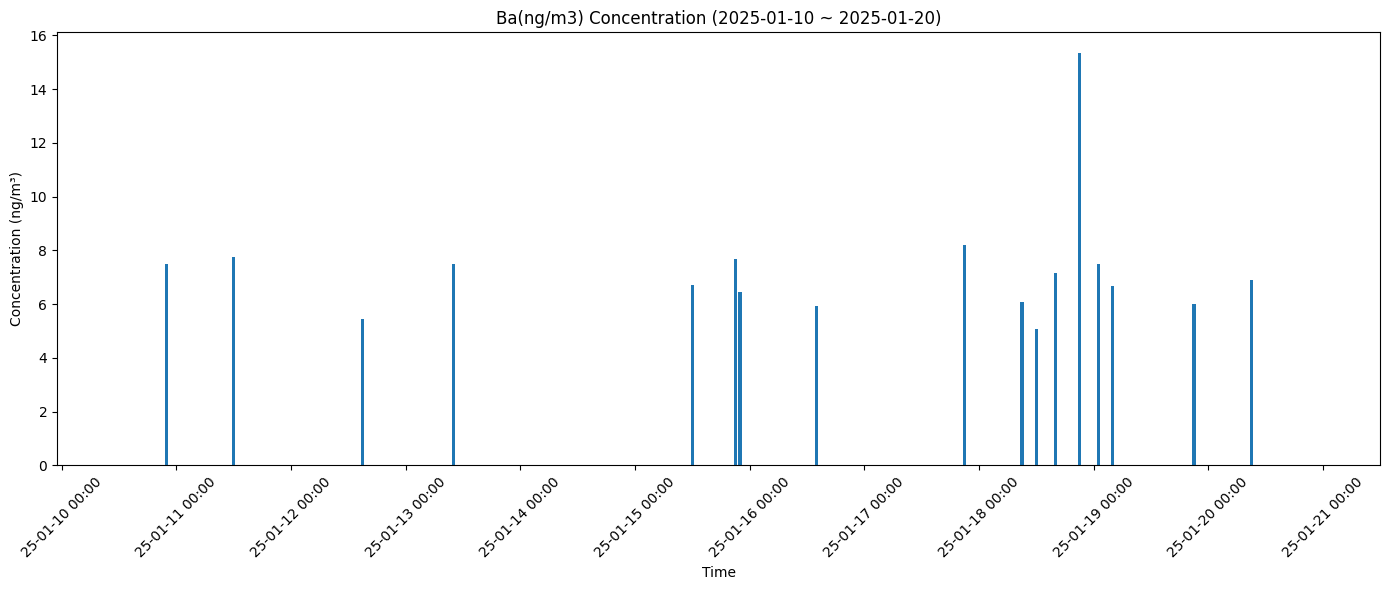

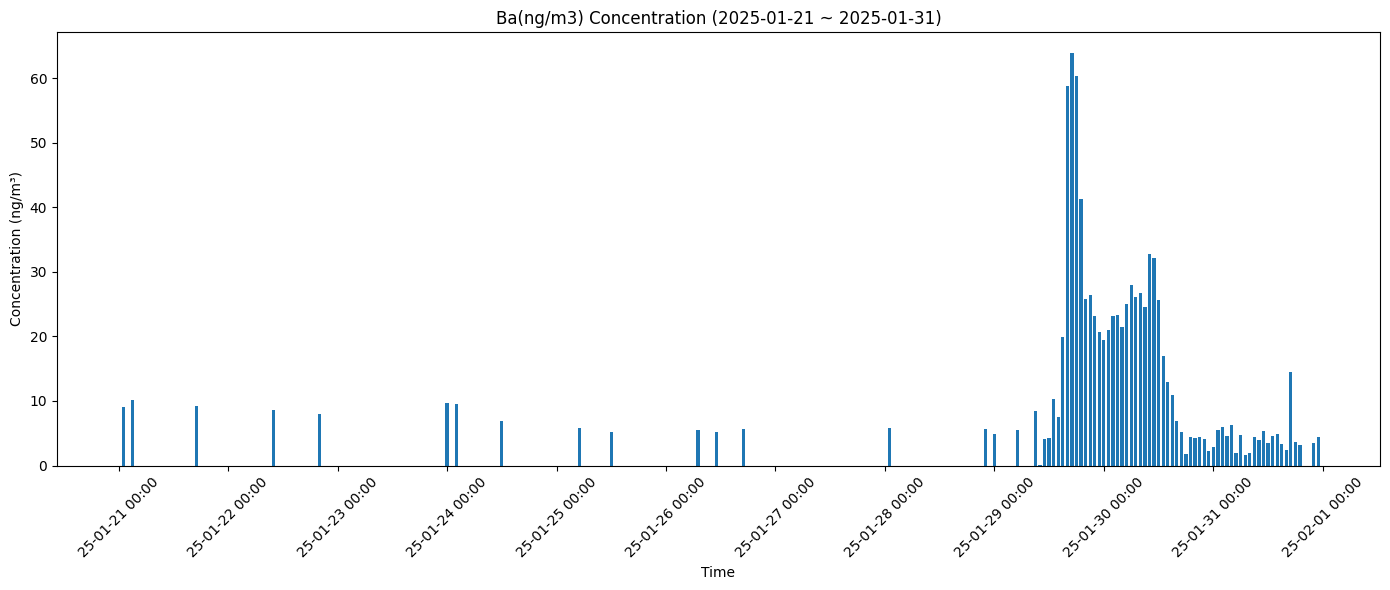

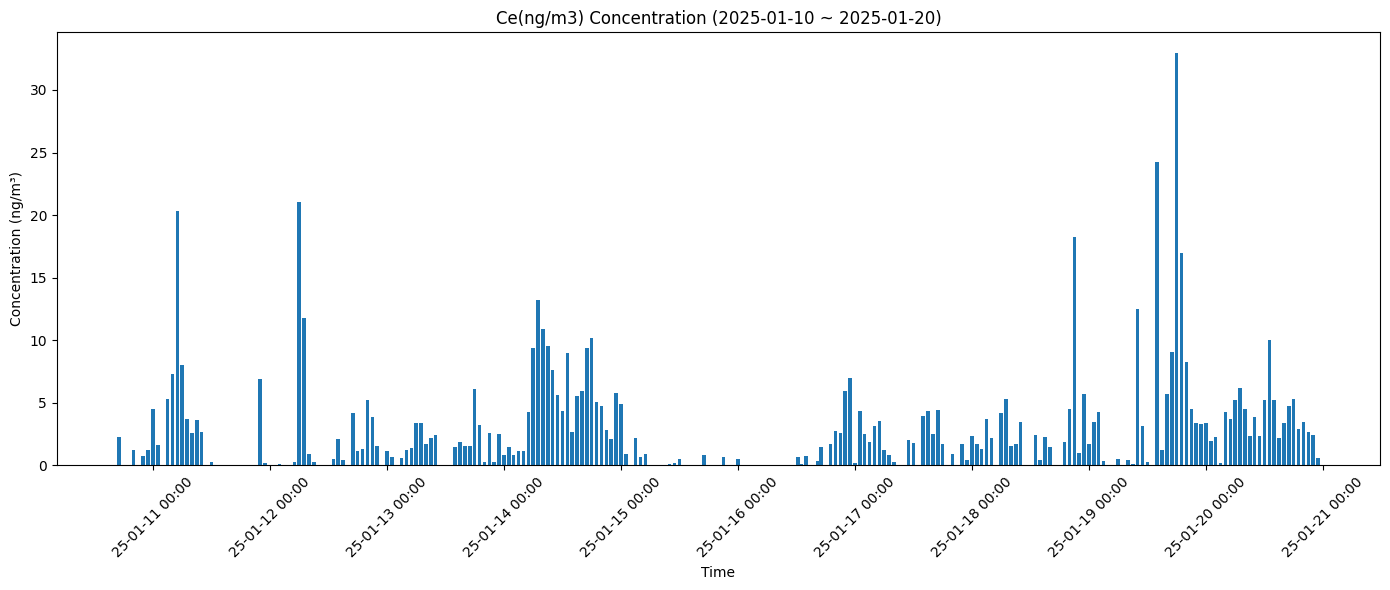

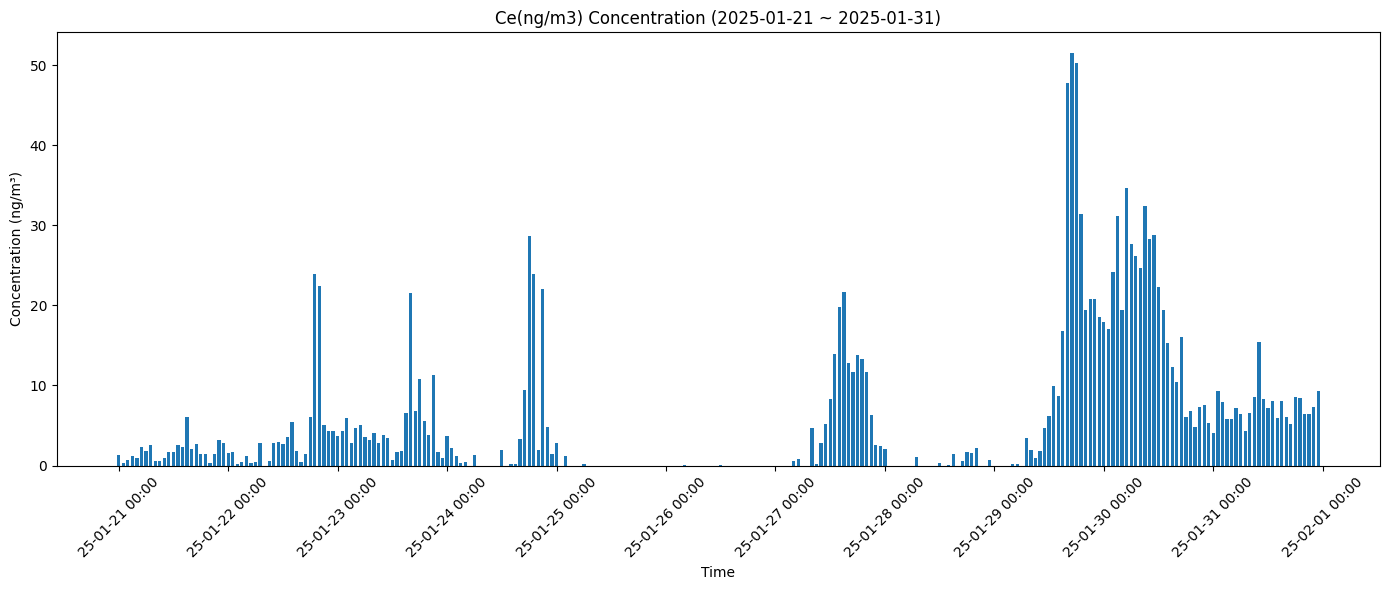

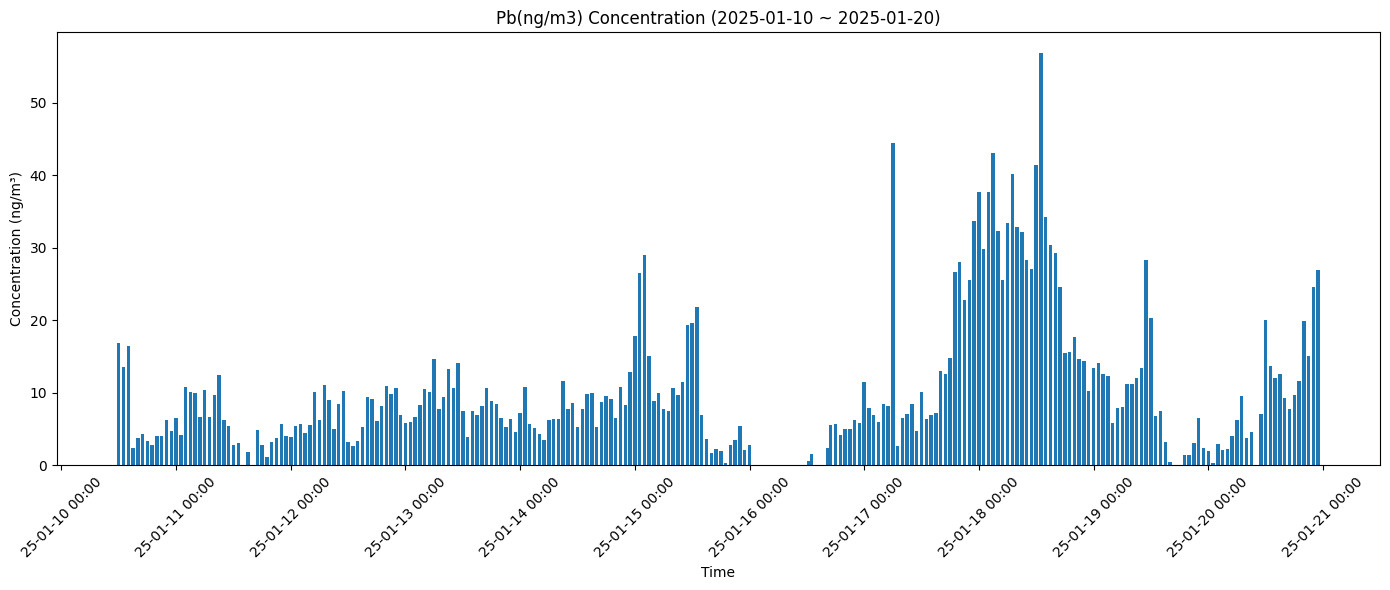

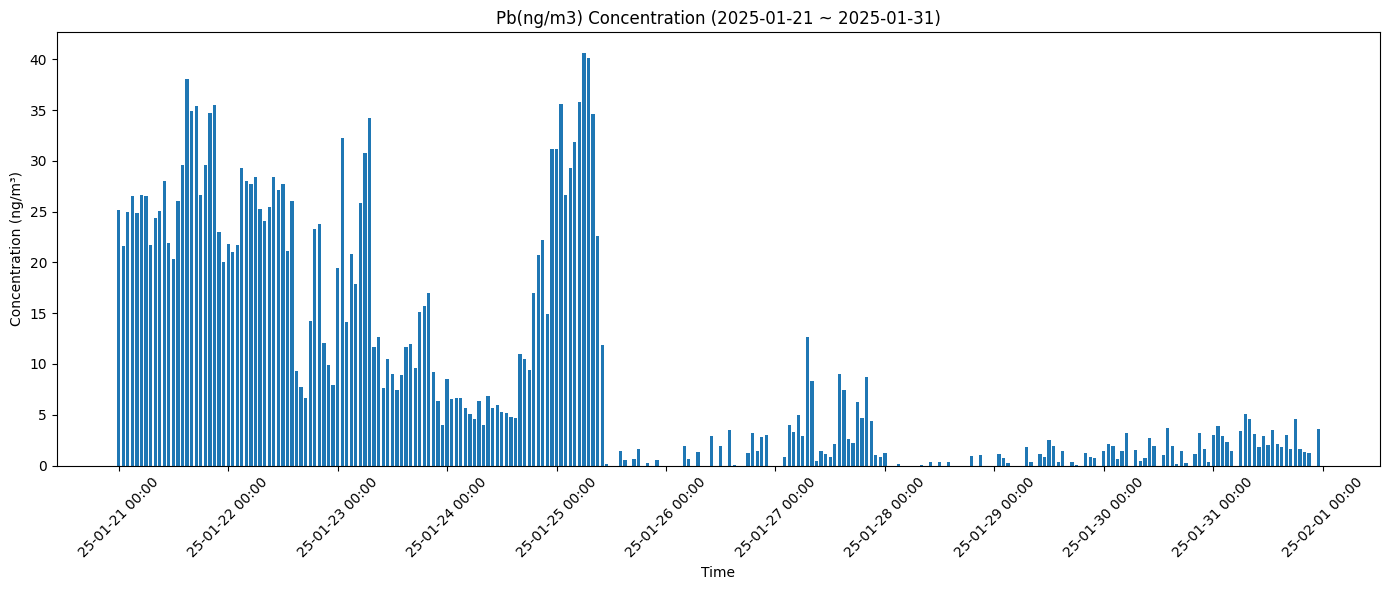

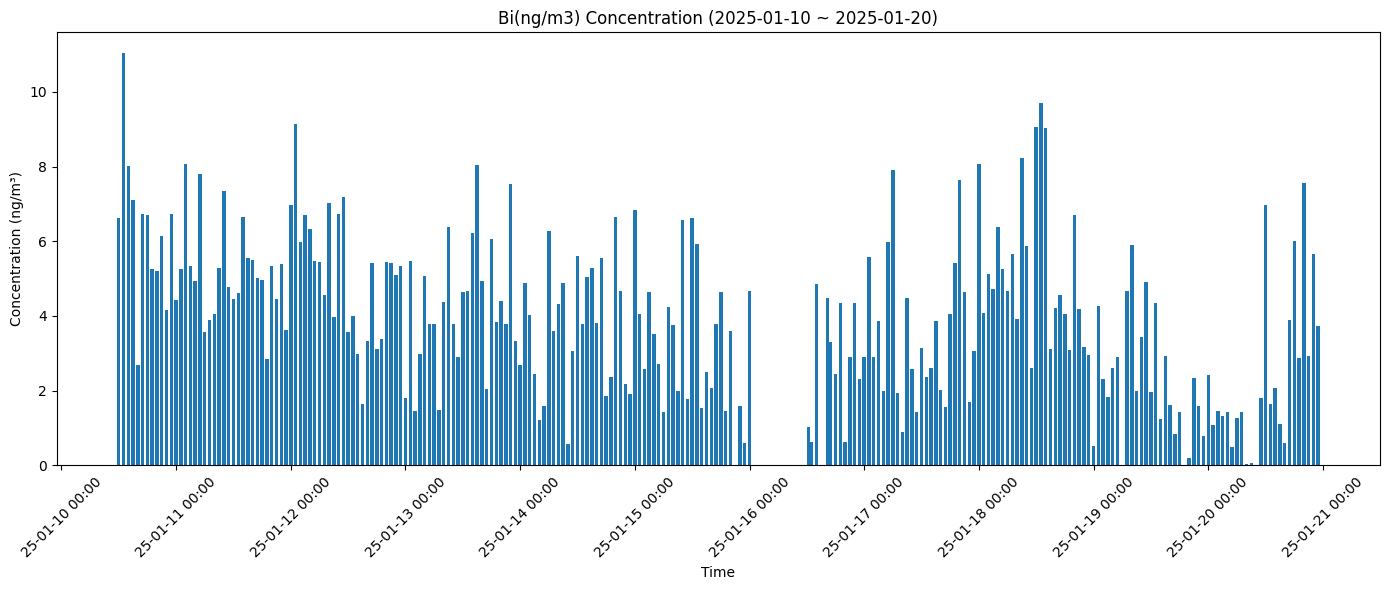

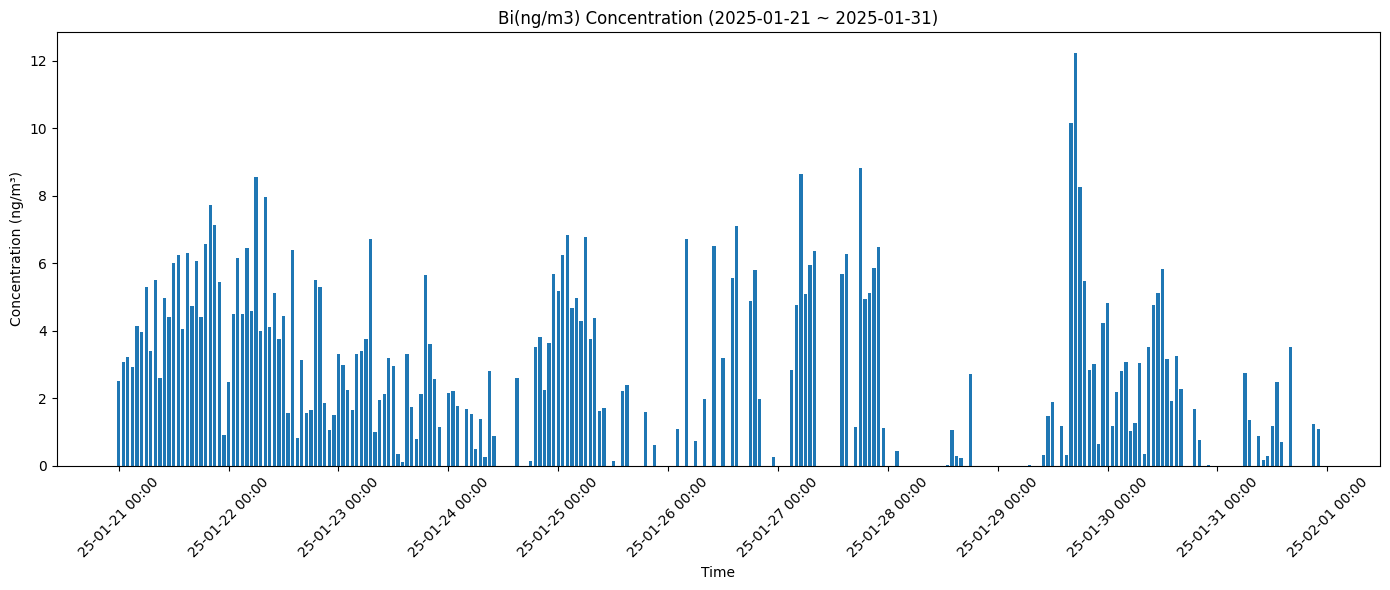

In [20]:
# 개별 금속 막대그래프 생성 (11일 단위)
for metal in metal_columns:
    for idx, date_group in enumerate(chunks, start=1):
        temp_df = df[df['Date'].isin(date_group)] # 해당 구간 데이터만 추출

        # 막대그래프 그리기
        plt.figure(figsize=(14, 6))
        plt.bar(temp_df['Pump-Begin'], temp_df[metal], width=0.03)

        # 그래프 기본 설정
        plt.title(f'{metal} Concentration ({date_group[0]} ~ {date_group[-1]})')
        plt.xlabel('Time')
        plt.ylabel('Concentration (ng/m³)')

        # X축 설정 : 가독성 위해 하루 단위로 표시, 데이터는 1시간 단위
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
        plt.xticks(rotation=45)

        # 그래프 출력
        plt.tight_layout()
        plt.show()